# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 20:13:58.008455: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T20:14:00.784267
2025-04-14 20:14:00.784267


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 9
MODEL_TO_USE = 2

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 937
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 20:13:55"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

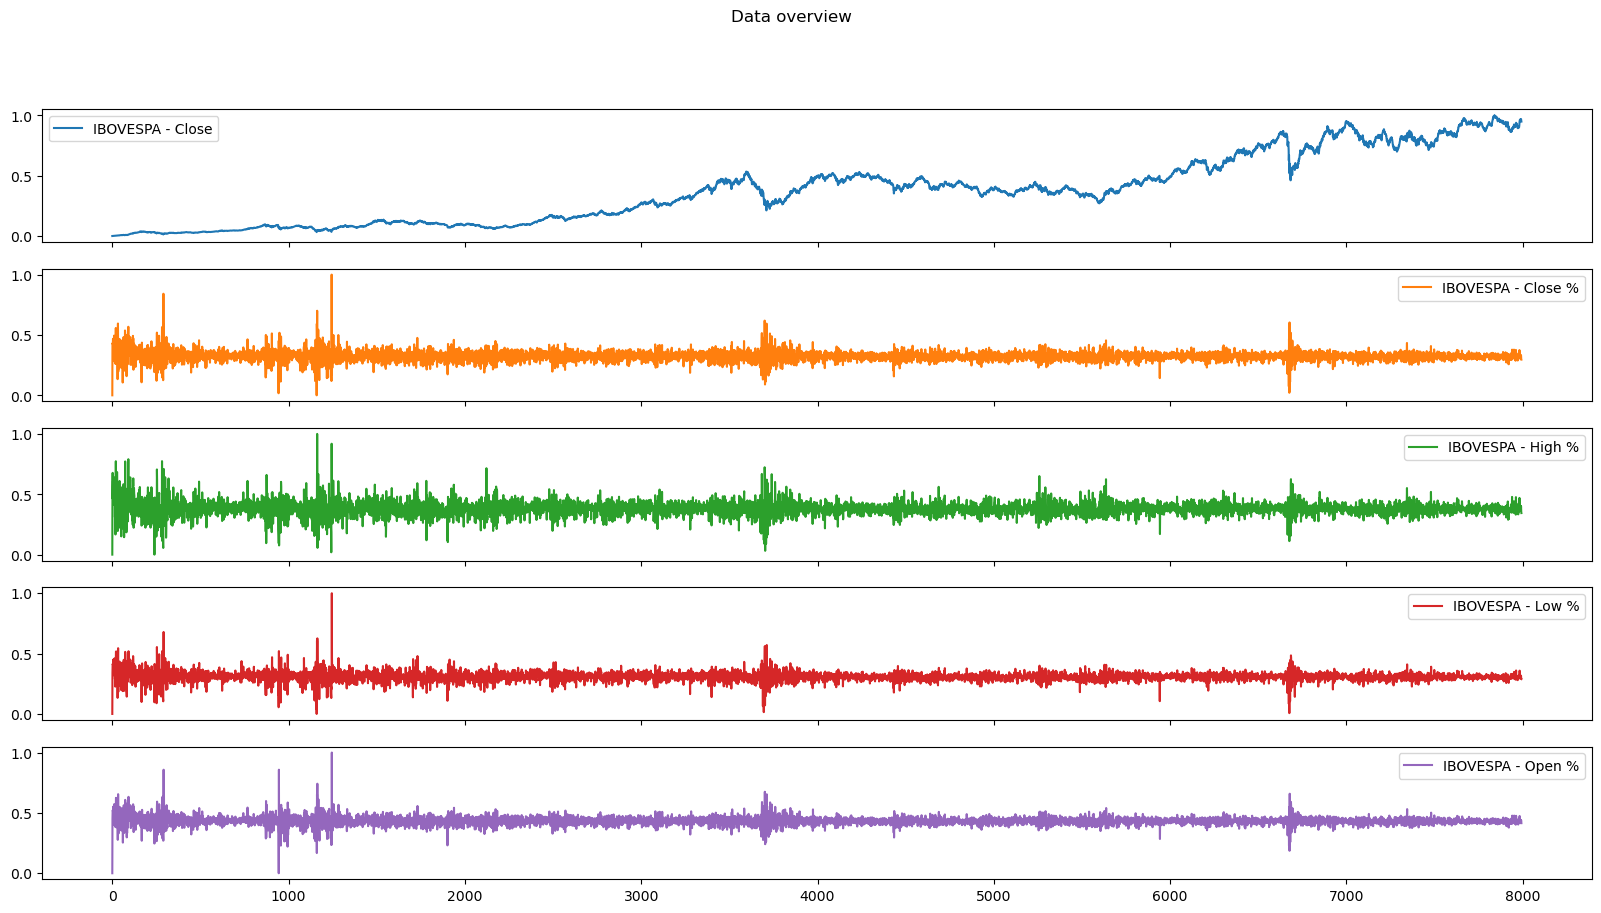

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

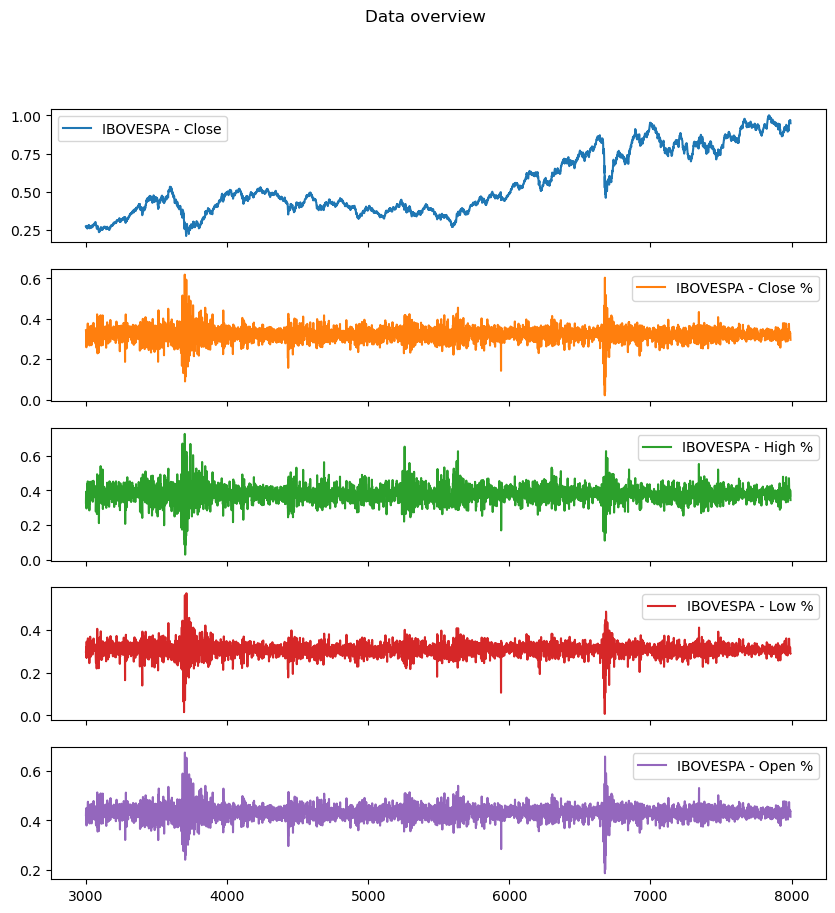

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

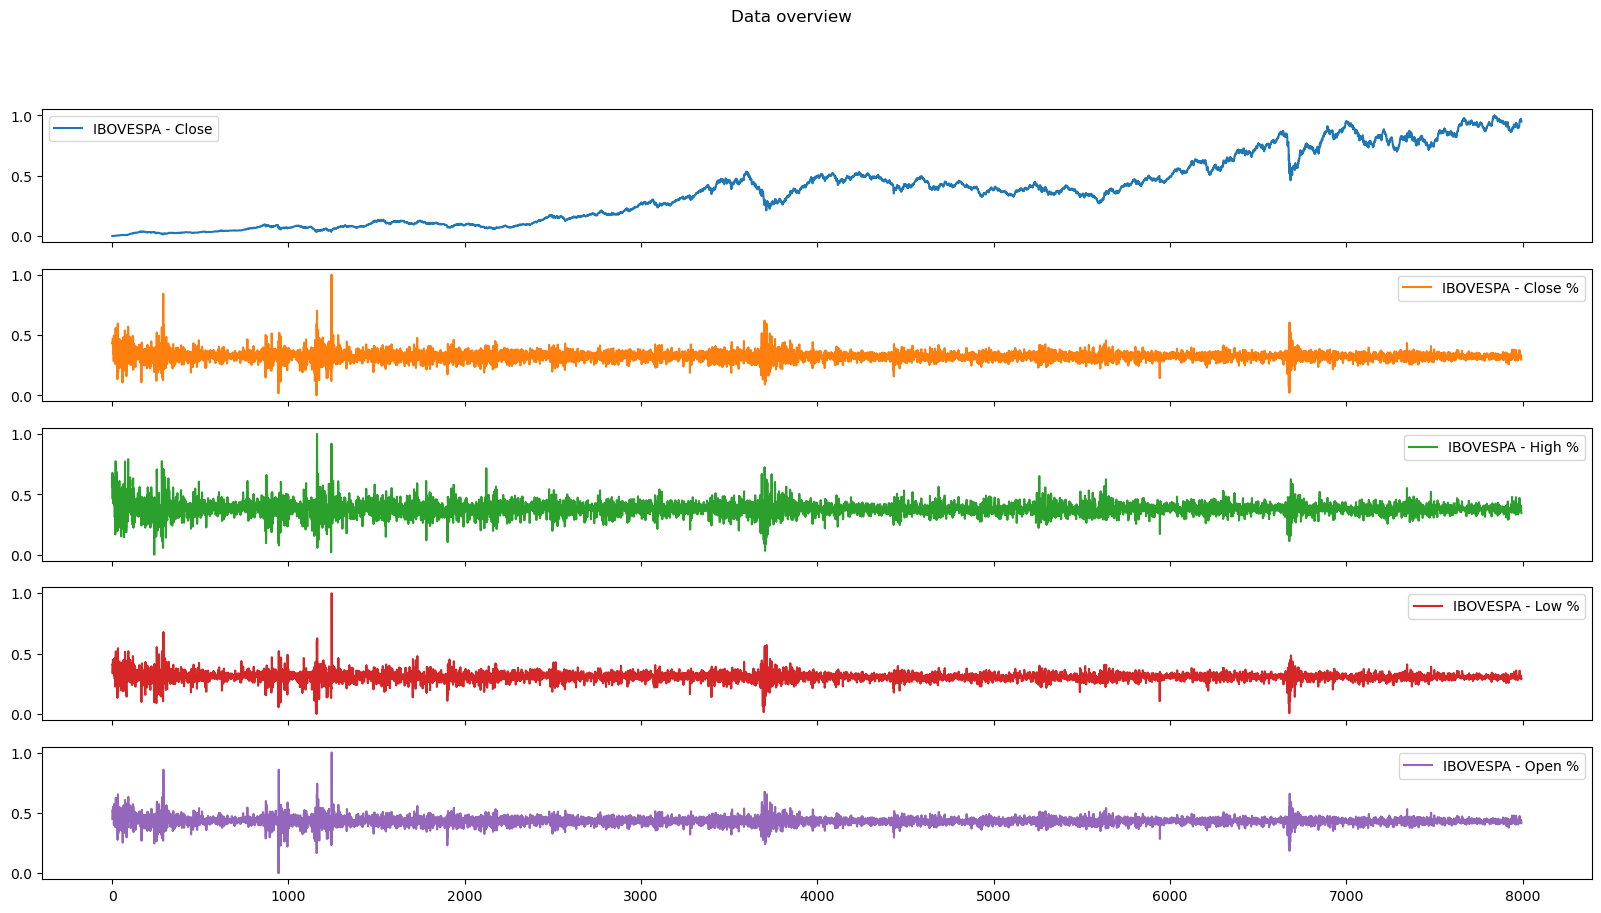

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

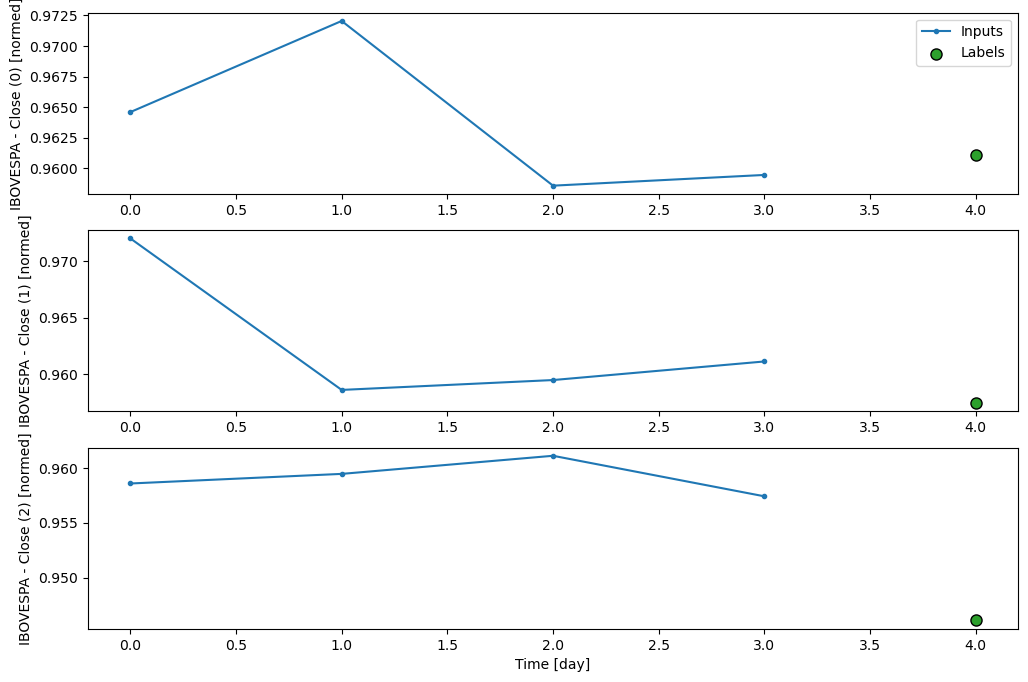

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 5), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

5

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 17:13 4s/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0882e-05 - root_mean_squared_error: 0.0033

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 90.9349 - mean_squared_error: 1.3685e-04 - root_mean_squared_error: 0.0110   

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 77.2210 - mean_squared_error: 1.6357e-04 - root_mean_squared_error: 0.0124

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 68.2155 - mean_squared_error: 1.5783e-04 - root_mean_squared_error: 0.0123

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 62.4513 - mean_squared_error: 1.5377e-04 - root_mean_squared_error: 0.0122

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 57.4383 - mean_squared_error: 1.5814e-04 - root_mean_squared_error: 0.0124

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 53.8004 - mean_squared_error: 1.6518e-04 - root_mean_squared_error: 0.0127

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 50.4633 - mean_squared_error: 1.7481e-04 - root_mean_squared_error: 0.0130

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 47.9324 - mean_squared_error: 1.8118e-04 - root_mean_squared_error: 0.0133

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 45.7454 - mean_squared_error: 1.8629e-04 - root_mean_squared_error: 0.0135

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 43.8631 - mean_squared_error: 1.9008e-04 - root_mean_squared_error: 0.0136

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 42.0485 - mean_squared_error: 1.9642e-04 - root_mean_squared_error: 0.0139

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 40.4394 - mean_squared_error: 2.0368e-04 - root_mean_squared_error: 0.0141

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 39.0103 - mean_squared_error: 2.1732e-04 - root_mean_squared_error: 0.0145

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 38.0658 - mean_squared_error: 2.3884e-04 - root_mean_squared_error: 0.0151

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 37.3169 - mean_squared_error: 2.5522e-04 - root_mean_squared_error: 0.0155

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 36.4659 - mean_squared_error: 2.7498e-04 - root_mean_squared_error: 0.0160

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 35.5047 - mean_squared_error: 3.6288e-04 - root_mean_squared_error: 0.0176

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 34.8065 - mean_squared_error: 4.9957e-04 - root_mean_squared_error: 0.0195

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 34.2131 - mean_squared_error: 6.9689e-04 - root_mean_squared_error: 0.0219

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 33.6503 - mean_squared_error: 8.7720e-04 - root_mean_squared_error: 0.0241

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 32.9592 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0265    

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 32.3008 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0287

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 31.6822 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0305

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 31.1041 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0322

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 30.5674 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0337

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 30.0767 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0351

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 29.6053 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0364

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 29.1600 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0378

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 28.7073 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0395

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 28.2777 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0411

238/238 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 28.0705 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0419 - val_loss: 0.2247 - val_mean_absolute_error: 0.2247 - val_mean_absolute_percentage_error: 24.1643 - val_mean_squared_error: 0.0520 - val_root_mean_squared_error: 0.2280 - lr: 0.0098


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.6939 - mean_absolute_error: 0.6939 - mean_absolute_percentage_error: 29920.0625 - mean_squared_error: 0.4816 - root_mean_squared_error: 0.6939

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6576 - mean_absolute_error: 0.6576 - mean_absolute_percentage_error: 12505.1846 - mean_squared_error: 0.4342 - root_mean_squared_error: 0.6584 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6134 - mean_absolute_error: 0.6134 - mean_absolute_percentage_error: 8862.5205 - mean_squared_error: 0.3836 - root_mean_squared_error: 0.6173 

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5583 - mean_absolute_error: 0.5583 - mean_absolute_percentage_error: 7050.8496 - mean_squared_error: 0.3351 - root_mean_squared_error: 0.5738

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5037 - mean_absolute_error: 0.5037 - mean_absolute_percentage_error: 5908.9097 - mean_squared_error: 0.2949 - root_mean_squared_error: 0.5343

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4574 - mean_absolute_error: 0.4574 - mean_absolute_percentage_error: 5115.8911 - mean_squared_error: 0.2633 - root_mean_squared_error: 0.5012

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4191 - mean_absolute_error: 0.4191 - mean_absolute_percentage_error: 4529.0957 - mean_squared_error: 0.2381 - root_mean_squared_error: 0.4733

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3871 - mean_absolute_error: 0.3871 - mean_absolute_percentage_error: 4075.2361 - mean_squared_error: 0.2177 - root_mean_squared_error: 0.4497

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3575 - mean_absolute_error: 0.3575 - mean_absolute_percentage_error: 3676.8816 - mean_squared_error: 0.1992 - root_mean_squared_error: 0.4273

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3351 - mean_absolute_error: 0.3351 - mean_absolute_percentage_error: 3385.9341 - mean_squared_error: 0.1853 - root_mean_squared_error: 0.4098

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3138 - mean_absolute_error: 0.3138 - mean_absolute_percentage_error: 3117.4023 - mean_squared_error: 0.1722 - root_mean_squared_error: 0.3928

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2972 - mean_absolute_error: 0.2972 - mean_absolute_percentage_error: 2913.1873 - mean_squared_error: 0.1620 - root_mean_squared_error: 0.3793

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2812 - mean_absolute_error: 0.2812 - mean_absolute_percentage_error: 2718.5295 - mean_squared_error: 0.1523 - root_mean_squared_error: 0.3658

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2702 - mean_absolute_error: 0.2702 - mean_absolute_percentage_error: 2582.5024 - mean_squared_error: 0.1454 - root_mean_squared_error: 0.3562

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2640 - mean_absolute_error: 0.2640 - mean_absolute_percentage_error: 2504.9539 - mean_squared_error: 0.1415 - root_mean_squared_error: 0.3507

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2605 - mean_absolute_error: 0.2605 - mean_absolute_percentage_error: 2460.8667 - mean_squared_error: 0.1392 - root_mean_squared_error: 0.3475

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2517 - mean_absolute_error: 0.2517 - mean_absolute_percentage_error: 2351.3267 - mean_squared_error: 0.1336 - root_mean_squared_error: 0.3394

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2428 - mean_absolute_error: 0.2428 - mean_absolute_percentage_error: 2240.3491 - mean_squared_error: 0.1279 - root_mean_squared_error: 0.3310

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2356 - mean_absolute_error: 0.2356 - mean_absolute_percentage_error: 2151.0188 - mean_squared_error: 0.1233 - root_mean_squared_error: 0.3241

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2281 - mean_absolute_error: 0.2281 - mean_absolute_percentage_error: 2059.4976 - mean_squared_error: 0.1186 - root_mean_squared_error: 0.3169

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2212 - mean_absolute_error: 0.2212 - mean_absolute_percentage_error: 1976.2045 - mean_squared_error: 0.1142 - root_mean_squared_error: 0.3101

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2148 - mean_absolute_error: 0.2148 - mean_absolute_percentage_error: 1900.0439 - mean_squared_error: 0.1102 - root_mean_squared_error: 0.3038

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2089 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 1830.1211 - mean_squared_error: 0.1065 - root_mean_squared_error: 0.2979

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2036 - mean_absolute_error: 0.2036 - mean_absolute_percentage_error: 1765.6920 - mean_squared_error: 0.1031 - root_mean_squared_error: 0.2925

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1988 - mean_absolute_error: 0.1988 - mean_absolute_percentage_error: 1706.0947 - mean_squared_error: 0.0999 - root_mean_squared_error: 0.2874

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1944 - mean_absolute_error: 0.1944 - mean_absolute_percentage_error: 1650.7888 - mean_squared_error: 0.0970 - root_mean_squared_error: 0.2826

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1903 - mean_absolute_error: 0.1903 - mean_absolute_percentage_error: 1599.3097 - mean_squared_error: 0.0943 - root_mean_squared_error: 0.2782

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1866 - mean_absolute_error: 0.1866 - mean_absolute_percentage_error: 1551.2589 - mean_squared_error: 0.0918 - root_mean_squared_error: 0.2740

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1846 - mean_absolute_error: 0.1846 - mean_absolute_percentage_error: 1525.9271 - mean_squared_error: 0.0904 - root_mean_squared_error: 0.2717 - val_loss: 0.1386 - val_mean_absolute_error: 0.1386 - val_mean_absolute_percentage_error: 14.8333 - val_mean_squared_error: 0.0207 - val_root_mean_squared_error: 0.1440 - lr: 0.0095


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7833 - mean_absolute_error: 0.7833 - mean_absolute_percentage_error: 33767.8828 - mean_squared_error: 0.6136 - root_mean_squared_error: 0.7833

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7709 - mean_absolute_error: 0.7709 - mean_absolute_percentage_error: 14276.9951 - mean_squared_error: 0.5948 - root_mean_squared_error: 0.7712 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7412 - mean_absolute_error: 0.7412 - mean_absolute_percentage_error: 10513.6553 - mean_squared_error: 0.5535 - root_mean_squared_error: 0.7431

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6931 - mean_absolute_error: 0.6931 - mean_absolute_percentage_error: 8362.2939 - mean_squared_error: 0.4970 - root_mean_squared_error: 0.7017 

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6361 - mean_absolute_error: 0.6361 - mean_absolute_percentage_error: 7013.1240 - mean_squared_error: 0.4434 - root_mean_squared_error: 0.6591

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5847 - mean_absolute_error: 0.5847 - mean_absolute_percentage_error: 6077.7783 - mean_squared_error: 0.3990 - root_mean_squared_error: 0.6213

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5361 - mean_absolute_error: 0.5361 - mean_absolute_percentage_error: 5319.3926 - mean_squared_error: 0.3592 - root_mean_squared_error: 0.5855

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4991 - mean_absolute_error: 0.4991 - mean_absolute_percentage_error: 4797.5352 - mean_squared_error: 0.3300 - root_mean_squared_error: 0.5579

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4638 - mean_absolute_error: 0.4638 - mean_absolute_percentage_error: 4337.2378 - mean_squared_error: 0.3031 - root_mean_squared_error: 0.5314

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4364 - mean_absolute_error: 0.4364 - mean_absolute_percentage_error: 3999.7119 - mean_squared_error: 0.2828 - root_mean_squared_error: 0.5106

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4099 - mean_absolute_error: 0.4099 - mean_absolute_percentage_error: 3687.2908 - mean_squared_error: 0.2634 - root_mean_squared_error: 0.4902

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3891 - mean_absolute_error: 0.3891 - mean_absolute_percentage_error: 3449.1841 - mean_squared_error: 0.2484 - root_mean_squared_error: 0.4739

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3707 - mean_absolute_error: 0.3707 - mean_absolute_percentage_error: 3242.9922 - mean_squared_error: 0.2352 - root_mean_squared_error: 0.4591

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3545 - mean_absolute_error: 0.3545 - mean_absolute_percentage_error: 3062.5928 - mean_squared_error: 0.2235 - root_mean_squared_error: 0.4459

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3420 - mean_absolute_error: 0.3420 - mean_absolute_percentage_error: 2920.1448 - mean_squared_error: 0.2143 - root_mean_squared_error: 0.4352

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3306 - mean_absolute_error: 0.3306 - mean_absolute_percentage_error: 2791.6948 - mean_squared_error: 0.2059 - root_mean_squared_error: 0.4254

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3201 - mean_absolute_error: 0.3201 - mean_absolute_percentage_error: 2675.2212 - mean_squared_error: 0.1982 - root_mean_squared_error: 0.4162

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3116 - mean_absolute_error: 0.3116 - mean_absolute_percentage_error: 2581.8191 - mean_squared_error: 0.1920 - root_mean_squared_error: 0.4087

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3014 - mean_absolute_error: 0.3014 - mean_absolute_percentage_error: 2471.8540 - mean_squared_error: 0.1846 - root_mean_squared_error: 0.3996

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2920 - mean_absolute_error: 0.2920 - mean_absolute_percentage_error: 2371.8015 - mean_squared_error: 0.1779 - root_mean_squared_error: 0.3911

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2824 - mean_absolute_error: 0.2824 - mean_absolute_percentage_error: 2270.6580 - mean_squared_error: 0.1710 - root_mean_squared_error: 0.3823

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2745 - mean_absolute_error: 0.2745 - mean_absolute_percentage_error: 2187.4771 - mean_squared_error: 0.1653 - root_mean_squared_error: 0.3750

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2672 - mean_absolute_error: 0.2672 - mean_absolute_percentage_error: 2110.7971 - mean_squared_error: 0.1601 - root_mean_squared_error: 0.3681

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2605 - mean_absolute_error: 0.2605 - mean_absolute_percentage_error: 2039.8431 - mean_squared_error: 0.1552 - root_mean_squared_error: 0.3616

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2536 - mean_absolute_error: 0.2536 - mean_absolute_percentage_error: 1966.9574 - mean_squared_error: 0.1502 - root_mean_squared_error: 0.3549

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2492 - mean_absolute_error: 0.2492 - mean_absolute_percentage_error: 1919.2729 - mean_squared_error: 0.1469 - root_mean_squared_error: 0.3504

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2437 - mean_absolute_error: 0.2437 - mean_absolute_percentage_error: 1861.5941 - mean_squared_error: 0.1429 - root_mean_squared_error: 0.3449

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2397 - mean_absolute_error: 0.2397 - mean_absolute_percentage_error: 1819.3267 - mean_squared_error: 0.1399 - root_mean_squared_error: 0.3408 - val_loss: 0.1624 - val_mean_absolute_error: 0.1624 - val_mean_absolute_percentage_error: 17.4196 - val_mean_squared_error: 0.0279 - val_root_mean_squared_error: 0.1671 - lr: 0.0093


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.7594 - mean_absolute_error: 0.7594 - mean_absolute_percentage_error: 32737.0957 - mean_squared_error: 0.5767 - root_mean_squared_error: 0.7594

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7362 - mean_absolute_error: 0.7362 - mean_absolute_percentage_error: 13767.3643 - mean_squared_error: 0.5428 - root_mean_squared_error: 0.7366 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7019 - mean_absolute_error: 0.7019 - mean_absolute_percentage_error: 9569.2637 - mean_squared_error: 0.4967 - root_mean_squared_error: 0.7038 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6683 - mean_absolute_error: 0.6683 - mean_absolute_percentage_error: 7755.2344 - mean_squared_error: 0.4559 - root_mean_squared_error: 0.6728

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6321 - mean_absolute_error: 0.6321 - mean_absolute_percentage_error: 6492.8389 - mean_squared_error: 0.4156 - root_mean_squared_error: 0.6404

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6016 - mean_absolute_error: 0.6016 - mean_absolute_percentage_error: 5707.3018 - mean_squared_error: 0.3844 - root_mean_squared_error: 0.6139

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5715 - mean_absolute_error: 0.5715 - mean_absolute_percentage_error: 5111.2251 - mean_squared_error: 0.3569 - root_mean_squared_error: 0.5893

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5422 - mean_absolute_error: 0.5422 - mean_absolute_percentage_error: 4640.0488 - mean_squared_error: 0.3327 - root_mean_squared_error: 0.5667

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5119 - mean_absolute_error: 0.5119 - mean_absolute_percentage_error: 4218.8203 - mean_squared_error: 0.3094 - root_mean_squared_error: 0.5441

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4874 - mean_absolute_error: 0.4874 - mean_absolute_percentage_error: 3906.8850 - mean_squared_error: 0.2913 - root_mean_squared_error: 0.5258

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4651 - mean_absolute_error: 0.4651 - mean_absolute_percentage_error: 3642.6355 - mean_squared_error: 0.2752 - root_mean_squared_error: 0.5092

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4449 - mean_absolute_error: 0.4449 - mean_absolute_percentage_error: 3415.5312 - mean_squared_error: 0.2611 - root_mean_squared_error: 0.4940

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4265 - mean_absolute_error: 0.4265 - mean_absolute_percentage_error: 3217.9651 - mean_squared_error: 0.2484 - root_mean_squared_error: 0.4802

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4100 - mean_absolute_error: 0.4100 - mean_absolute_percentage_error: 3044.4041 - mean_squared_error: 0.2371 - root_mean_squared_error: 0.4675

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3953 - mean_absolute_error: 0.3953 - mean_absolute_percentage_error: 2890.6570 - mean_squared_error: 0.2269 - root_mean_squared_error: 0.4560

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3824 - mean_absolute_error: 0.3824 - mean_absolute_percentage_error: 2753.4004 - mean_squared_error: 0.2178 - root_mean_squared_error: 0.4455

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3719 - mean_absolute_error: 0.3719 - mean_absolute_percentage_error: 2643.0764 - mean_squared_error: 0.2104 - root_mean_squared_error: 0.4368

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3620 - mean_absolute_error: 0.3620 - mean_absolute_percentage_error: 2542.1816 - mean_squared_error: 0.2036 - root_mean_squared_error: 0.4286

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3505 - mean_absolute_error: 0.3505 - mean_absolute_percentage_error: 2427.5115 - mean_squared_error: 0.1957 - root_mean_squared_error: 0.4190

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3409 - mean_absolute_error: 0.3409 - mean_absolute_percentage_error: 2333.7158 - mean_squared_error: 0.1891 - root_mean_squared_error: 0.4110

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3319 - mean_absolute_error: 0.3319 - mean_absolute_percentage_error: 2247.6570 - mean_squared_error: 0.1831 - root_mean_squared_error: 0.4034

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3235 - mean_absolute_error: 0.3235 - mean_absolute_percentage_error: 2168.3945 - mean_squared_error: 0.1774 - root_mean_squared_error: 0.3963

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3158 - mean_absolute_error: 0.3158 - mean_absolute_percentage_error: 2095.1182 - mean_squared_error: 0.1722 - root_mean_squared_error: 0.3895

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3085 - mean_absolute_error: 0.3085 - mean_absolute_percentage_error: 2027.1360 - mean_squared_error: 0.1673 - root_mean_squared_error: 0.3832

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3018 - mean_absolute_error: 0.3018 - mean_absolute_percentage_error: 1963.8949 - mean_squared_error: 0.1628 - root_mean_squared_error: 0.3772

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2955 - mean_absolute_error: 0.2955 - mean_absolute_percentage_error: 1904.8916 - mean_squared_error: 0.1585 - root_mean_squared_error: 0.3715

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2895 - mean_absolute_error: 0.2895 - mean_absolute_percentage_error: 1849.6892 - mean_squared_error: 0.1545 - root_mean_squared_error: 0.3662

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2883 - mean_absolute_error: 0.2883 - mean_absolute_percentage_error: 1837.9167 - mean_squared_error: 0.1536 - root_mean_squared_error: 0.3650 - val_loss: 0.1589 - val_mean_absolute_error: 0.1589 - val_mean_absolute_percentage_error: 17.0415 - val_mean_squared_error: 0.0268 - val_root_mean_squared_error: 0.1636 - lr: 0.0090


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7378 - mean_absolute_error: 0.7378 - mean_absolute_percentage_error: 31823.3711 - mean_squared_error: 0.5444 - root_mean_squared_error: 0.7378

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7059 - mean_absolute_error: 0.7059 - mean_absolute_percentage_error: 13350.3330 - mean_squared_error: 0.5004 - root_mean_squared_error: 0.7069 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6407 - mean_absolute_error: 0.6407 - mean_absolute_percentage_error: 9151.1572 - mean_squared_error: 0.4247 - root_mean_squared_error: 0.6483 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5839 - mean_absolute_error: 0.5839 - mean_absolute_percentage_error: 7329.5698 - mean_squared_error: 0.3687 - root_mean_squared_error: 0.6003

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5294 - mean_absolute_error: 0.5294 - mean_absolute_percentage_error: 6169.3340 - mean_squared_error: 0.3243 - root_mean_squared_error: 0.5589

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4830 - mean_absolute_error: 0.4830 - mean_absolute_percentage_error: 5357.7344 - mean_squared_error: 0.2897 - root_mean_squared_error: 0.5244

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4405 - mean_absolute_error: 0.4405 - mean_absolute_percentage_error: 4696.0947 - mean_squared_error: 0.2595 - root_mean_squared_error: 0.4925

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4085 - mean_absolute_error: 0.4085 - mean_absolute_percentage_error: 4238.9380 - mean_squared_error: 0.2377 - root_mean_squared_error: 0.4683

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3813 - mean_absolute_error: 0.3813 - mean_absolute_percentage_error: 3871.2952 - mean_squared_error: 0.2196 - root_mean_squared_error: 0.4475

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3604 - mean_absolute_error: 0.3604 - mean_absolute_percentage_error: 3599.5020 - mean_squared_error: 0.2059 - root_mean_squared_error: 0.4312

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3378 - mean_absolute_error: 0.3378 - mean_absolute_percentage_error: 3314.2200 - mean_squared_error: 0.1913 - root_mean_squared_error: 0.4133

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3203 - mean_absolute_error: 0.3203 - mean_absolute_percentage_error: 3097.2671 - mean_squared_error: 0.1800 - root_mean_squared_error: 0.3990

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3048 - mean_absolute_error: 0.3048 - mean_absolute_percentage_error: 2909.7144 - mean_squared_error: 0.1701 - root_mean_squared_error: 0.3862

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2914 - mean_absolute_error: 0.2914 - mean_absolute_percentage_error: 2745.8750 - mean_squared_error: 0.1614 - root_mean_squared_error: 0.3747

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2800 - mean_absolute_error: 0.2800 - mean_absolute_percentage_error: 2601.4739 - mean_squared_error: 0.1538 - root_mean_squared_error: 0.3646

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2696 - mean_absolute_error: 0.2696 - mean_absolute_percentage_error: 2472.9766 - mean_squared_error: 0.1470 - root_mean_squared_error: 0.3552

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2603 - mean_absolute_error: 0.2603 - mean_absolute_percentage_error: 2357.8340 - mean_squared_error: 0.1408 - root_mean_squared_error: 0.3467

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2508 - mean_absolute_error: 0.2508 - mean_absolute_percentage_error: 2243.0615 - mean_squared_error: 0.1346 - root_mean_squared_error: 0.3379

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2430 - mean_absolute_error: 0.2430 - mean_absolute_percentage_error: 2149.8420 - mean_squared_error: 0.1296 - root_mean_squared_error: 0.3306

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2350 - mean_absolute_error: 0.2350 - mean_absolute_percentage_error: 2055.8252 - mean_squared_error: 0.1244 - root_mean_squared_error: 0.3230

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2284 - mean_absolute_error: 0.2284 - mean_absolute_percentage_error: 1978.6693 - mean_squared_error: 0.1202 - root_mean_squared_error: 0.3167

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2224 - mean_absolute_error: 0.2224 - mean_absolute_percentage_error: 1907.6752 - mean_squared_error: 0.1162 - root_mean_squared_error: 0.3107

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2169 - mean_absolute_error: 0.2169 - mean_absolute_percentage_error: 1842.0952 - mean_squared_error: 0.1126 - root_mean_squared_error: 0.3052

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2117 - mean_absolute_error: 0.2117 - mean_absolute_percentage_error: 1781.3119 - mean_squared_error: 0.1092 - root_mean_squared_error: 0.2999

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2070 - mean_absolute_error: 0.2070 - mean_absolute_percentage_error: 1724.8110 - mean_squared_error: 0.1061 - root_mean_squared_error: 0.2950

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2021 - mean_absolute_error: 0.2021 - mean_absolute_percentage_error: 1666.4934 - mean_squared_error: 0.1029 - root_mean_squared_error: 0.2899

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1984 - mean_absolute_error: 0.1984 - mean_absolute_percentage_error: 1622.8894 - mean_squared_error: 0.1004 - root_mean_squared_error: 0.2860 - val_loss: 0.1634 - val_mean_absolute_error: 0.1634 - val_mean_absolute_percentage_error: 17.5206 - val_mean_squared_error: 0.0282 - val_root_mean_squared_error: 0.1680 - lr: 0.0088


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.7591 - mean_absolute_error: 0.7591 - mean_absolute_percentage_error: 32724.7109 - mean_squared_error: 0.5762 - root_mean_squared_error: 0.7591

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7365 - mean_absolute_error: 0.7365 - mean_absolute_percentage_error: 13765.8750 - mean_squared_error: 0.5432 - root_mean_squared_error: 0.7369 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7014 - mean_absolute_error: 0.7014 - mean_absolute_percentage_error: 9566.6182 - mean_squared_error: 0.4964 - root_mean_squared_error: 0.7035 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6604 - mean_absolute_error: 0.6604 - mean_absolute_percentage_error: 7738.5503 - mean_squared_error: 0.4497 - root_mean_squared_error: 0.6675

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6131 - mean_absolute_error: 0.6131 - mean_absolute_percentage_error: 6558.1523 - mean_squared_error: 0.4054 - root_mean_squared_error: 0.6308

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5680 - mean_absolute_error: 0.5680 - mean_absolute_percentage_error: 5722.1543 - mean_squared_error: 0.3677 - root_mean_squared_error: 0.5974

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5297 - mean_absolute_error: 0.5297 - mean_absolute_percentage_error: 5096.4487 - mean_squared_error: 0.3366 - root_mean_squared_error: 0.5685

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4963 - mean_absolute_error: 0.4963 - mean_absolute_percentage_error: 4607.4609 - mean_squared_error: 0.3106 - root_mean_squared_error: 0.5432

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4641 - mean_absolute_error: 0.4641 - mean_absolute_percentage_error: 4174.6113 - mean_squared_error: 0.2864 - root_mean_squared_error: 0.5187

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4392 - mean_absolute_error: 0.4392 - mean_absolute_percentage_error: 3856.3384 - mean_squared_error: 0.2680 - root_mean_squared_error: 0.4993

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4149 - mean_absolute_error: 0.4149 - mean_absolute_percentage_error: 3560.8237 - mean_squared_error: 0.2504 - root_mean_squared_error: 0.4802

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3954 - mean_absolute_error: 0.3954 - mean_absolute_percentage_error: 3334.9290 - mean_squared_error: 0.2366 - root_mean_squared_error: 0.4648

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3781 - mean_absolute_error: 0.3781 - mean_absolute_percentage_error: 3138.8716 - mean_squared_error: 0.2244 - root_mean_squared_error: 0.4509

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3629 - mean_absolute_error: 0.3629 - mean_absolute_percentage_error: 2967.0210 - mean_squared_error: 0.2136 - root_mean_squared_error: 0.4383

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3481 - mean_absolute_error: 0.3481 - mean_absolute_percentage_error: 2799.2209 - mean_squared_error: 0.2030 - root_mean_squared_error: 0.4258

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3359 - mean_absolute_error: 0.3359 - mean_absolute_percentage_error: 2665.2654 - mean_squared_error: 0.1945 - root_mean_squared_error: 0.4154

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3249 - mean_absolute_error: 0.3249 - mean_absolute_percentage_error: 2544.8562 - mean_squared_error: 0.1867 - root_mean_squared_error: 0.4058

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3146 - mean_absolute_error: 0.3146 - mean_absolute_percentage_error: 2435.9463 - mean_squared_error: 0.1796 - root_mean_squared_error: 0.3969

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3041 - mean_absolute_error: 0.3041 - mean_absolute_percentage_error: 2326.4563 - mean_squared_error: 0.1724 - root_mean_squared_error: 0.3877

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2954 - mean_absolute_error: 0.2954 - mean_absolute_percentage_error: 2236.8489 - mean_squared_error: 0.1665 - root_mean_squared_error: 0.3799

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2873 - mean_absolute_error: 0.2873 - mean_absolute_percentage_error: 2154.5962 - mean_squared_error: 0.1610 - root_mean_squared_error: 0.3727

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2807 - mean_absolute_error: 0.2807 - mean_absolute_percentage_error: 2086.9358 - mean_squared_error: 0.1564 - root_mean_squared_error: 0.3666

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2745 - mean_absolute_error: 0.2745 - mean_absolute_percentage_error: 2023.8346 - mean_squared_error: 0.1522 - root_mean_squared_error: 0.3609

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2680 - mean_absolute_error: 0.2680 - mean_absolute_percentage_error: 1957.7192 - mean_squared_error: 0.1477 - root_mean_squared_error: 0.3548

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2620 - mean_absolute_error: 0.2620 - mean_absolute_percentage_error: 1896.2305 - mean_squared_error: 0.1436 - root_mean_squared_error: 0.3490

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2564 - mean_absolute_error: 0.2564 - mean_absolute_percentage_error: 1838.8712 - mean_squared_error: 0.1397 - root_mean_squared_error: 0.3436

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2505 - mean_absolute_error: 0.2505 - mean_absolute_percentage_error: 1779.4915 - mean_squared_error: 0.1356 - root_mean_squared_error: 0.3379 - val_loss: 0.1575 - val_mean_absolute_error: 0.1575 - val_mean_absolute_percentage_error: 16.8793 - val_mean_squared_error: 0.0263 - val_root_mean_squared_error: 0.1622 - lr: 0.0086


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7647 - mean_absolute_error: 0.7647 - mean_absolute_percentage_error: 32967.0000 - mean_squared_error: 0.5848 - root_mean_squared_error: 0.7647

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7404 - mean_absolute_error: 0.7404 - mean_absolute_percentage_error: 13855.5605 - mean_squared_error: 0.5490 - root_mean_squared_error: 0.7407 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7076 - mean_absolute_error: 0.7076 - mean_absolute_percentage_error: 9635.9551 - mean_squared_error: 0.5044 - root_mean_squared_error: 0.7093 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6709 - mean_absolute_error: 0.6709 - mean_absolute_percentage_error: 7805.7847 - mean_squared_error: 0.4610 - root_mean_squared_error: 0.6764

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6292 - mean_absolute_error: 0.6292 - mean_absolute_percentage_error: 6626.7993 - mean_squared_error: 0.4189 - root_mean_squared_error: 0.6422

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5867 - mean_absolute_error: 0.5867 - mean_absolute_percentage_error: 5790.2129 - mean_squared_error: 0.3819 - root_mean_squared_error: 0.6101

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5485 - mean_absolute_error: 0.5485 - mean_absolute_percentage_error: 5161.3047 - mean_squared_error: 0.3506 - root_mean_squared_error: 0.5816

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5146 - mean_absolute_error: 0.5146 - mean_absolute_percentage_error: 4668.8638 - mean_squared_error: 0.3242 - root_mean_squared_error: 0.5564

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4847 - mean_absolute_error: 0.4847 - mean_absolute_percentage_error: 4271.7803 - mean_squared_error: 0.3017 - root_mean_squared_error: 0.5342

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4587 - mean_absolute_error: 0.4587 - mean_absolute_percentage_error: 3944.0117 - mean_squared_error: 0.2825 - root_mean_squared_error: 0.5144

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4359 - mean_absolute_error: 0.4359 - mean_absolute_percentage_error: 3668.1929 - mean_squared_error: 0.2658 - root_mean_squared_error: 0.4968

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4155 - mean_absolute_error: 0.4155 - mean_absolute_percentage_error: 3432.2842 - mean_squared_error: 0.2511 - root_mean_squared_error: 0.4809

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3953 - mean_absolute_error: 0.3953 - mean_absolute_percentage_error: 3206.9082 - mean_squared_error: 0.2368 - root_mean_squared_error: 0.4650

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3793 - mean_absolute_error: 0.3793 - mean_absolute_percentage_error: 3030.6008 - mean_squared_error: 0.2255 - root_mean_squared_error: 0.4521

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3652 - mean_absolute_error: 0.3652 - mean_absolute_percentage_error: 2874.7620 - mean_squared_error: 0.2154 - root_mean_squared_error: 0.4404

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3523 - mean_absolute_error: 0.3523 - mean_absolute_percentage_error: 2735.7866 - mean_squared_error: 0.2063 - root_mean_squared_error: 0.4296

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3393 - mean_absolute_error: 0.3393 - mean_absolute_percentage_error: 2597.9285 - mean_squared_error: 0.1971 - root_mean_squared_error: 0.4185

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3286 - mean_absolute_error: 0.3286 - mean_absolute_percentage_error: 2486.4182 - mean_squared_error: 0.1896 - root_mean_squared_error: 0.4093

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3175 - mean_absolute_error: 0.3175 - mean_absolute_percentage_error: 2374.3516 - mean_squared_error: 0.1820 - root_mean_squared_error: 0.3998

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3084 - mean_absolute_error: 0.3084 - mean_absolute_percentage_error: 2282.6631 - mean_squared_error: 0.1758 - root_mean_squared_error: 0.3918

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2999 - mean_absolute_error: 0.2999 - mean_absolute_percentage_error: 2198.5212 - mean_squared_error: 0.1699 - root_mean_squared_error: 0.3843

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2921 - mean_absolute_error: 0.2921 - mean_absolute_percentage_error: 2121.0127 - mean_squared_error: 0.1646 - root_mean_squared_error: 0.3773

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2849 - mean_absolute_error: 0.2849 - mean_absolute_percentage_error: 2049.3486 - mean_squared_error: 0.1596 - root_mean_squared_error: 0.3707

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2782 - mean_absolute_error: 0.2782 - mean_absolute_percentage_error: 1982.8657 - mean_squared_error: 0.1550 - root_mean_squared_error: 0.3645

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2721 - mean_absolute_error: 0.2721 - mean_absolute_percentage_error: 1921.0022 - mean_squared_error: 0.1506 - root_mean_squared_error: 0.3586

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2663 - mean_absolute_error: 0.2663 - mean_absolute_percentage_error: 1863.2690 - mean_squared_error: 0.1466 - root_mean_squared_error: 0.3531

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2608 - mean_absolute_error: 0.2608 - mean_absolute_percentage_error: 1809.2662 - mean_squared_error: 0.1428 - root_mean_squared_error: 0.3478 - val_loss: 0.1463 - val_mean_absolute_error: 0.1463 - val_mean_absolute_percentage_error: 15.6706 - val_mean_squared_error: 0.0229 - val_root_mean_squared_error: 0.1514 - lr: 0.0084


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.7757 - mean_absolute_error: 0.7757 - mean_absolute_percentage_error: 33437.8750 - mean_squared_error: 0.6017 - root_mean_squared_error: 0.7757

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7509 - mean_absolute_error: 0.7509 - mean_absolute_percentage_error: 14051.2900 - mean_squared_error: 0.5646 - root_mean_squared_error: 0.7512 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7193 - mean_absolute_error: 0.7193 - mean_absolute_percentage_error: 9778.1201 - mean_squared_error: 0.5209 - root_mean_squared_error: 0.7209 

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6806 - mean_absolute_error: 0.6806 - mean_absolute_percentage_error: 7771.4336 - mean_squared_error: 0.4738 - root_mean_squared_error: 0.6858

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6413 - mean_absolute_error: 0.6413 - mean_absolute_percentage_error: 6630.2417 - mean_squared_error: 0.4329 - root_mean_squared_error: 0.6531

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6009 - mean_absolute_error: 0.6009 - mean_absolute_percentage_error: 5814.0859 - mean_squared_error: 0.3963 - root_mean_squared_error: 0.6221

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5717 - mean_absolute_error: 0.5717 - mean_absolute_percentage_error: 5320.2104 - mean_squared_error: 0.3716 - root_mean_squared_error: 0.6001

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5376 - mean_absolute_error: 0.5376 - mean_absolute_percentage_error: 4808.7412 - mean_squared_error: 0.3441 - root_mean_squared_error: 0.5747

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5069 - mean_absolute_error: 0.5069 - mean_absolute_percentage_error: 4396.6699 - mean_squared_error: 0.3205 - root_mean_squared_error: 0.5520

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4771 - mean_absolute_error: 0.4771 - mean_absolute_percentage_error: 4022.7983 - mean_squared_error: 0.2981 - root_mean_squared_error: 0.5297

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4536 - mean_absolute_error: 0.4536 - mean_absolute_percentage_error: 3742.4045 - mean_squared_error: 0.2807 - root_mean_squared_error: 0.5118

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4324 - mean_absolute_error: 0.4324 - mean_absolute_percentage_error: 3502.4702 - mean_squared_error: 0.2654 - root_mean_squared_error: 0.4957

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4134 - mean_absolute_error: 0.4134 - mean_absolute_percentage_error: 3294.5620 - mean_squared_error: 0.2519 - root_mean_squared_error: 0.4810

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3966 - mean_absolute_error: 0.3966 - mean_absolute_percentage_error: 3112.5303 - mean_squared_error: 0.2399 - root_mean_squared_error: 0.4677

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3818 - mean_absolute_error: 0.3818 - mean_absolute_percentage_error: 2951.7524 - mean_squared_error: 0.2292 - root_mean_squared_error: 0.4556

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3682 - mean_absolute_error: 0.3682 - mean_absolute_percentage_error: 2808.4568 - mean_squared_error: 0.2195 - root_mean_squared_error: 0.4444

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3559 - mean_absolute_error: 0.3559 - mean_absolute_percentage_error: 2679.8630 - mean_squared_error: 0.2107 - root_mean_squared_error: 0.4341

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3445 - mean_absolute_error: 0.3445 - mean_absolute_percentage_error: 2563.7341 - mean_squared_error: 0.2027 - root_mean_squared_error: 0.4245

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3328 - mean_absolute_error: 0.3328 - mean_absolute_percentage_error: 2447.1421 - mean_squared_error: 0.1945 - root_mean_squared_error: 0.4146

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3231 - mean_absolute_error: 0.3231 - mean_absolute_percentage_error: 2351.8364 - mean_squared_error: 0.1878 - root_mean_squared_error: 0.4063

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3141 - mean_absolute_error: 0.3141 - mean_absolute_percentage_error: 2264.4414 - mean_squared_error: 0.1815 - root_mean_squared_error: 0.3985

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3058 - mean_absolute_error: 0.3058 - mean_absolute_percentage_error: 2183.9888 - mean_squared_error: 0.1758 - root_mean_squared_error: 0.3912

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2973 - mean_absolute_error: 0.2973 - mean_absolute_percentage_error: 2101.7449 - mean_squared_error: 0.1699 - root_mean_squared_error: 0.3836

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2904 - mean_absolute_error: 0.2904 - mean_absolute_percentage_error: 2033.3955 - mean_squared_error: 0.1650 - root_mean_squared_error: 0.3772

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2839 - mean_absolute_error: 0.2839 - mean_absolute_percentage_error: 1969.8081 - mean_squared_error: 0.1604 - root_mean_squared_error: 0.3711

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2778 - mean_absolute_error: 0.2778 - mean_absolute_percentage_error: 1910.4775 - mean_squared_error: 0.1561 - root_mean_squared_error: 0.3654

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2715 - mean_absolute_error: 0.2715 - mean_absolute_percentage_error: 1849.0416 - mean_squared_error: 0.1516 - root_mean_squared_error: 0.3594 - val_loss: 0.1391 - val_mean_absolute_error: 0.1391 - val_mean_absolute_percentage_error: 14.8908 - val_mean_squared_error: 0.0209 - val_root_mean_squared_error: 0.1445 - lr: 0.0082


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.7827 - mean_absolute_error: 0.7827 - mean_absolute_percentage_error: 33741.0391 - mean_squared_error: 0.6126 - root_mean_squared_error: 0.7827

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7598 - mean_absolute_error: 0.7598 - mean_absolute_percentage_error: 14190.0898 - mean_squared_error: 0.5780 - root_mean_squared_error: 0.7601 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7340 - mean_absolute_error: 0.7340 - mean_absolute_percentage_error: 10165.1943 - mean_squared_error: 0.5413 - root_mean_squared_error: 0.7351

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7025 - mean_absolute_error: 0.7025 - mean_absolute_percentage_error: 8191.1709 - mean_squared_error: 0.5010 - root_mean_squared_error: 0.7060 

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6662 - mean_absolute_error: 0.6662 - mean_absolute_percentage_error: 6940.3535 - mean_squared_error: 0.4604 - root_mean_squared_error: 0.6748

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6282 - mean_absolute_error: 0.6282 - mean_absolute_percentage_error: 6062.3252 - mean_squared_error: 0.4230 - root_mean_squared_error: 0.6443

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5907 - mean_absolute_error: 0.5907 - mean_absolute_percentage_error: 5402.2944 - mean_squared_error: 0.3902 - root_mean_squared_error: 0.6160

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5562 - mean_absolute_error: 0.5562 - mean_absolute_percentage_error: 4885.8105 - mean_squared_error: 0.3620 - root_mean_squared_error: 0.5906

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5250 - mean_absolute_error: 0.5250 - mean_absolute_percentage_error: 4469.1382 - mean_squared_error: 0.3377 - root_mean_squared_error: 0.5678

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4972 - mean_absolute_error: 0.4972 - mean_absolute_percentage_error: 4125.2124 - mean_squared_error: 0.3166 - root_mean_squared_error: 0.5474

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4725 - mean_absolute_error: 0.4725 - mean_absolute_percentage_error: 3835.8442 - mean_squared_error: 0.2982 - root_mean_squared_error: 0.5290

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4480 - mean_absolute_error: 0.4480 - mean_absolute_percentage_error: 3563.2117 - mean_squared_error: 0.2804 - root_mean_squared_error: 0.5107

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4284 - mean_absolute_error: 0.4284 - mean_absolute_percentage_error: 3352.3391 - mean_squared_error: 0.2663 - root_mean_squared_error: 0.4957

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4109 - mean_absolute_error: 0.4109 - mean_absolute_percentage_error: 3167.6436 - mean_squared_error: 0.2537 - root_mean_squared_error: 0.4821

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3955 - mean_absolute_error: 0.3955 - mean_absolute_percentage_error: 3004.4714 - mean_squared_error: 0.2425 - root_mean_squared_error: 0.4698

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3814 - mean_absolute_error: 0.3814 - mean_absolute_percentage_error: 2858.9990 - mean_squared_error: 0.2323 - root_mean_squared_error: 0.4584

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3686 - mean_absolute_error: 0.3686 - mean_absolute_percentage_error: 2728.4185 - mean_squared_error: 0.2231 - root_mean_squared_error: 0.4478

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3567 - mean_absolute_error: 0.3567 - mean_absolute_percentage_error: 2610.4685 - mean_squared_error: 0.2146 - root_mean_squared_error: 0.4380

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3457 - mean_absolute_error: 0.3457 - mean_absolute_percentage_error: 2503.3281 - mean_squared_error: 0.2069 - root_mean_squared_error: 0.4288

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3378 - mean_absolute_error: 0.3378 - mean_absolute_percentage_error: 2426.5232 - mean_squared_error: 0.2013 - root_mean_squared_error: 0.4221

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3281 - mean_absolute_error: 0.3281 - mean_absolute_percentage_error: 2335.1533 - mean_squared_error: 0.1945 - root_mean_squared_error: 0.4139

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3192 - mean_absolute_error: 0.3192 - mean_absolute_percentage_error: 2251.1321 - mean_squared_error: 0.1883 - root_mean_squared_error: 0.4063

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3111 - mean_absolute_error: 0.3111 - mean_absolute_percentage_error: 2173.5874 - mean_squared_error: 0.1826 - root_mean_squared_error: 0.3991

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3036 - mean_absolute_error: 0.3036 - mean_absolute_percentage_error: 2101.7646 - mean_squared_error: 0.1772 - root_mean_squared_error: 0.3923

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2959 - mean_absolute_error: 0.2959 - mean_absolute_percentage_error: 2027.9053 - mean_squared_error: 0.1717 - root_mean_squared_error: 0.3852

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2894 - mean_absolute_error: 0.2894 - mean_absolute_percentage_error: 1966.1842 - mean_squared_error: 0.1670 - root_mean_squared_error: 0.3792

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2834 - mean_absolute_error: 0.2834 - mean_absolute_percentage_error: 1908.4865 - mean_squared_error: 0.1627 - root_mean_squared_error: 0.3735

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2808 - mean_absolute_error: 0.2808 - mean_absolute_percentage_error: 1884.0457 - mean_squared_error: 0.1608 - root_mean_squared_error: 0.3711 - val_loss: 0.1325 - val_mean_absolute_error: 0.1325 - val_mean_absolute_percentage_error: 14.1737 - val_mean_squared_error: 0.0191 - val_root_mean_squared_error: 0.1381 - lr: 0.0080


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7892 - mean_absolute_error: 0.7892 - mean_absolute_percentage_error: 34020.8320 - mean_squared_error: 0.6228 - root_mean_squared_error: 0.7892

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7670 - mean_absolute_error: 0.7670 - mean_absolute_percentage_error: 14311.7080 - mean_squared_error: 0.5889 - root_mean_squared_error: 0.7672 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7422 - mean_absolute_error: 0.7422 - mean_absolute_percentage_error: 10258.0195 - mean_squared_error: 0.5532 - root_mean_squared_error: 0.7432

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7121 - mean_absolute_error: 0.7121 - mean_absolute_percentage_error: 8271.4189 - mean_squared_error: 0.5140 - root_mean_squared_error: 0.7153 

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6774 - mean_absolute_error: 0.6774 - mean_absolute_percentage_error: 7012.9761 - mean_squared_error: 0.4740 - root_mean_squared_error: 0.6851

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6411 - mean_absolute_error: 0.6411 - mean_absolute_percentage_error: 6130.4854 - mean_squared_error: 0.4370 - root_mean_squared_error: 0.6554

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6041 - mean_absolute_error: 0.6041 - mean_absolute_percentage_error: 5466.1724 - mean_squared_error: 0.4039 - root_mean_squared_error: 0.6274

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5693 - mean_absolute_error: 0.5693 - mean_absolute_percentage_error: 4945.4268 - mean_squared_error: 0.3752 - root_mean_squared_error: 0.6020

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5377 - mean_absolute_error: 0.5377 - mean_absolute_percentage_error: 4525.0581 - mean_squared_error: 0.3504 - root_mean_squared_error: 0.5792

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5096 - mean_absolute_error: 0.5096 - mean_absolute_percentage_error: 4177.8984 - mean_squared_error: 0.3288 - root_mean_squared_error: 0.5587

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4845 - mean_absolute_error: 0.4845 - mean_absolute_percentage_error: 3885.7039 - mean_squared_error: 0.3100 - root_mean_squared_error: 0.5402

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4620 - mean_absolute_error: 0.4620 - mean_absolute_percentage_error: 3635.8391 - mean_squared_error: 0.2933 - root_mean_squared_error: 0.5234

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4417 - mean_absolute_error: 0.4417 - mean_absolute_percentage_error: 3419.4395 - mean_squared_error: 0.2786 - root_mean_squared_error: 0.5081

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4236 - mean_absolute_error: 0.4236 - mean_absolute_percentage_error: 3230.0393 - mean_squared_error: 0.2654 - root_mean_squared_error: 0.4942

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4077 - mean_absolute_error: 0.4077 - mean_absolute_percentage_error: 3062.8298 - mean_squared_error: 0.2537 - root_mean_squared_error: 0.4816

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3931 - mean_absolute_error: 0.3931 - mean_absolute_percentage_error: 2913.8569 - mean_squared_error: 0.2431 - root_mean_squared_error: 0.4699

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3798 - mean_absolute_error: 0.3798 - mean_absolute_percentage_error: 2780.2014 - mean_squared_error: 0.2334 - root_mean_squared_error: 0.4591

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3676 - mean_absolute_error: 0.3676 - mean_absolute_percentage_error: 2659.5369 - mean_squared_error: 0.2246 - root_mean_squared_error: 0.4490

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3563 - mean_absolute_error: 0.3563 - mean_absolute_percentage_error: 2549.9766 - mean_squared_error: 0.2164 - root_mean_squared_error: 0.4396

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3446 - mean_absolute_error: 0.3446 - mean_absolute_percentage_error: 2439.4392 - mean_squared_error: 0.2082 - root_mean_squared_error: 0.4299

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3339 - mean_absolute_error: 0.3339 - mean_absolute_percentage_error: 2339.0654 - mean_squared_error: 0.2006 - root_mean_squared_error: 0.4208

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3250 - mean_absolute_error: 0.3250 - mean_absolute_percentage_error: 2256.2795 - mean_squared_error: 0.1943 - root_mean_squared_error: 0.4131

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3169 - mean_absolute_error: 0.3169 - mean_absolute_percentage_error: 2179.7751 - mean_squared_error: 0.1885 - root_mean_squared_error: 0.4059

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3094 - mean_absolute_error: 0.3094 - mean_absolute_percentage_error: 2108.8340 - mean_squared_error: 0.1830 - root_mean_squared_error: 0.3992

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3024 - mean_absolute_error: 0.3024 - mean_absolute_percentage_error: 2042.8428 - mean_squared_error: 0.1780 - root_mean_squared_error: 0.3928

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2959 - mean_absolute_error: 0.2959 - mean_absolute_percentage_error: 1981.2767 - mean_squared_error: 0.1732 - root_mean_squared_error: 0.3868

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2891 - mean_absolute_error: 0.2891 - mean_absolute_percentage_error: 1917.5201 - mean_squared_error: 0.1683 - root_mean_squared_error: 0.3804

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2885 - mean_absolute_error: 0.2885 - mean_absolute_percentage_error: 1911.4054 - mean_squared_error: 0.1678 - root_mean_squared_error: 0.3798 - val_loss: 0.1267 - val_mean_absolute_error: 0.1267 - val_mean_absolute_percentage_error: 13.5410 - val_mean_squared_error: 0.0176 - val_root_mean_squared_error: 0.1325 - lr: 0.0078


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7949 - mean_absolute_error: 0.7949 - mean_absolute_percentage_error: 34267.6602 - mean_squared_error: 0.6319 - root_mean_squared_error: 0.7949

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7735 - mean_absolute_error: 0.7735 - mean_absolute_percentage_error: 14420.5195 - mean_squared_error: 0.5989 - root_mean_squared_error: 0.7737 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7498 - mean_absolute_error: 0.7498 - mean_absolute_percentage_error: 10341.6455 - mean_squared_error: 0.5644 - root_mean_squared_error: 0.7507

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7279 - mean_absolute_error: 0.7279 - mean_absolute_percentage_error: 8704.2568 - mean_squared_error: 0.5349 - root_mean_squared_error: 0.7301 

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6952 - mean_absolute_error: 0.6952 - mean_absolute_percentage_error: 7319.0107 - mean_squared_error: 0.4953 - root_mean_squared_error: 0.7011

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6606 - mean_absolute_error: 0.6606 - mean_absolute_percentage_error: 6366.1758 - mean_squared_error: 0.4579 - root_mean_squared_error: 0.6719

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6244 - mean_absolute_error: 0.6244 - mean_absolute_percentage_error: 5657.9062 - mean_squared_error: 0.4238 - root_mean_squared_error: 0.6439

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5856 - mean_absolute_error: 0.5856 - mean_absolute_percentage_error: 5052.3237 - mean_squared_error: 0.3908 - root_mean_squared_error: 0.6154

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5535 - mean_absolute_error: 0.5535 - mean_absolute_percentage_error: 4619.1401 - mean_squared_error: 0.3651 - root_mean_squared_error: 0.5923

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5217 - mean_absolute_error: 0.5217 - mean_absolute_percentage_error: 4226.0933 - mean_squared_error: 0.3404 - root_mean_squared_error: 0.5693

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4964 - mean_absolute_error: 0.4964 - mean_absolute_percentage_error: 3931.3843 - mean_squared_error: 0.3211 - root_mean_squared_error: 0.5507

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4711 - mean_absolute_error: 0.4711 - mean_absolute_percentage_error: 3653.4658 - mean_squared_error: 0.3023 - root_mean_squared_error: 0.5320

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4508 - mean_absolute_error: 0.4508 - mean_absolute_percentage_error: 3438.3423 - mean_squared_error: 0.2874 - root_mean_squared_error: 0.5167

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4327 - mean_absolute_error: 0.4327 - mean_absolute_percentage_error: 3249.8132 - mean_squared_error: 0.2740 - root_mean_squared_error: 0.5028

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4149 - mean_absolute_error: 0.4149 - mean_absolute_percentage_error: 3065.8003 - mean_squared_error: 0.2608 - root_mean_squared_error: 0.4888

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3988 - mean_absolute_error: 0.3988 - mean_absolute_percentage_error: 2903.6116 - mean_squared_error: 0.2489 - root_mean_squared_error: 0.4759

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3856 - mean_absolute_error: 0.3856 - mean_absolute_percentage_error: 2773.1750 - mean_squared_error: 0.2392 - root_mean_squared_error: 0.4652

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3735 - mean_absolute_error: 0.3735 - mean_absolute_percentage_error: 2655.1604 - mean_squared_error: 0.2304 - root_mean_squared_error: 0.4552

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3609 - mean_absolute_error: 0.3609 - mean_absolute_percentage_error: 2536.4751 - mean_squared_error: 0.2214 - root_mean_squared_error: 0.4449

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3505 - mean_absolute_error: 0.3505 - mean_absolute_percentage_error: 2439.3118 - mean_squared_error: 0.2139 - root_mean_squared_error: 0.4362

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3398 - mean_absolute_error: 0.3398 - mean_absolute_percentage_error: 2340.6277 - mean_squared_error: 0.2063 - root_mean_squared_error: 0.4271

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3310 - mean_absolute_error: 0.3310 - mean_absolute_percentage_error: 2259.1206 - mean_squared_error: 0.1999 - root_mean_squared_error: 0.4195

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3220 - mean_absolute_error: 0.3220 - mean_absolute_percentage_error: 2175.6646 - mean_squared_error: 0.1934 - root_mean_squared_error: 0.4116

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3146 - mean_absolute_error: 0.3146 - mean_absolute_percentage_error: 2106.2104 - mean_squared_error: 0.1879 - root_mean_squared_error: 0.4049

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3070 - mean_absolute_error: 0.3070 - mean_absolute_percentage_error: 2034.5917 - mean_squared_error: 0.1823 - root_mean_squared_error: 0.3979

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3005 - mean_absolute_error: 0.3005 - mean_absolute_percentage_error: 1974.5966 - mean_squared_error: 0.1775 - root_mean_squared_error: 0.3919

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2964 - mean_absolute_error: 0.2964 - mean_absolute_percentage_error: 1936.7479 - mean_squared_error: 0.1745 - root_mean_squared_error: 0.3881 - val_loss: 0.1250 - val_mean_absolute_error: 0.1250 - val_mean_absolute_percentage_error: 13.3588 - val_mean_squared_error: 0.0171 - val_root_mean_squared_error: 0.1309 - lr: 0.0076


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.7965 - mean_absolute_error: 0.7965 - mean_absolute_percentage_error: 34335.4531 - mean_squared_error: 0.6344 - root_mean_squared_error: 0.7965

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7754 - mean_absolute_error: 0.7754 - mean_absolute_percentage_error: 14450.9414 - mean_squared_error: 0.6019 - root_mean_squared_error: 0.7757 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7524 - mean_absolute_error: 0.7524 - mean_absolute_percentage_error: 10366.4658 - mean_squared_error: 0.5682 - root_mean_squared_error: 0.7533

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.7311 - mean_absolute_error: 0.7311 - mean_absolute_percentage_error: 8727.5264 - mean_squared_error: 0.5393 - root_mean_squared_error: 0.7332 

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.7174 - mean_absolute_error: 0.7174 - mean_absolute_percentage_error: 8039.7524 - mean_squared_error: 0.5220 - root_mean_squared_error: 0.7208

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6883 - mean_absolute_error: 0.6883 - mean_absolute_percentage_error: 6987.1831 - mean_squared_error: 0.4878 - root_mean_squared_error: 0.6953

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6542 - mean_absolute_error: 0.6542 - mean_absolute_percentage_error: 6130.4268 - mean_squared_error: 0.4518 - root_mean_squared_error: 0.6669

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6187 - mean_absolute_error: 0.6187 - mean_absolute_percentage_error: 5480.9263 - mean_squared_error: 0.4193 - root_mean_squared_error: 0.6399

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5848 - mean_absolute_error: 0.5848 - mean_absolute_percentage_error: 4968.9883 - mean_squared_error: 0.3906 - root_mean_squared_error: 0.6151

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5535 - mean_absolute_error: 0.5535 - mean_absolute_percentage_error: 4554.0620 - mean_squared_error: 0.3656 - root_mean_squared_error: 0.5926

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5255 - mean_absolute_error: 0.5255 - mean_absolute_percentage_error: 4210.2300 - mean_squared_error: 0.3438 - root_mean_squared_error: 0.5723

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5004 - mean_absolute_error: 0.5004 - mean_absolute_percentage_error: 3920.0593 - mean_squared_error: 0.3246 - root_mean_squared_error: 0.5539

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4777 - mean_absolute_error: 0.4777 - mean_absolute_percentage_error: 3671.3701 - mean_squared_error: 0.3076 - root_mean_squared_error: 0.5371

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4573 - mean_absolute_error: 0.4573 - mean_absolute_percentage_error: 3455.5864 - mean_squared_error: 0.2925 - root_mean_squared_error: 0.5218

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4390 - mean_absolute_error: 0.4390 - mean_absolute_percentage_error: 3266.4397 - mean_squared_error: 0.2789 - root_mean_squared_error: 0.5079

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4228 - mean_absolute_error: 0.4228 - mean_absolute_percentage_error: 3099.1921 - mean_squared_error: 0.2668 - root_mean_squared_error: 0.4951

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4111 - mean_absolute_error: 0.4111 - mean_absolute_percentage_error: 2981.7529 - mean_squared_error: 0.2582 - root_mean_squared_error: 0.4859

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3972 - mean_absolute_error: 0.3972 - mean_absolute_percentage_error: 2844.5991 - mean_squared_error: 0.2480 - root_mean_squared_error: 0.4747

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3845 - mean_absolute_error: 0.3845 - mean_absolute_percentage_error: 2720.8264 - mean_squared_error: 0.2386 - root_mean_squared_error: 0.4644

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3727 - mean_absolute_error: 0.3727 - mean_absolute_percentage_error: 2608.4814 - mean_squared_error: 0.2300 - root_mean_squared_error: 0.4547

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3617 - mean_absolute_error: 0.3617 - mean_absolute_percentage_error: 2506.0046 - mean_squared_error: 0.2221 - root_mean_squared_error: 0.4456

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3515 - mean_absolute_error: 0.3515 - mean_absolute_percentage_error: 2412.1106 - mean_squared_error: 0.2148 - root_mean_squared_error: 0.4371

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3421 - mean_absolute_error: 0.3421 - mean_absolute_percentage_error: 2325.7366 - mean_squared_error: 0.2080 - root_mean_squared_error: 0.4291

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3325 - mean_absolute_error: 0.3325 - mean_absolute_percentage_error: 2237.5095 - mean_squared_error: 0.2011 - root_mean_squared_error: 0.4208

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3246 - mean_absolute_error: 0.3246 - mean_absolute_percentage_error: 2164.2444 - mean_squared_error: 0.1953 - root_mean_squared_error: 0.4138

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3164 - mean_absolute_error: 0.3164 - mean_absolute_percentage_error: 2088.8530 - mean_squared_error: 0.1893 - root_mean_squared_error: 0.4064

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3096 - mean_absolute_error: 0.3096 - mean_absolute_percentage_error: 2025.8147 - mean_squared_error: 0.1842 - root_mean_squared_error: 0.4002

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3025 - mean_absolute_error: 0.3025 - mean_absolute_percentage_error: 1960.5382 - mean_squared_error: 0.1790 - root_mean_squared_error: 0.3936

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3011 - mean_absolute_error: 0.3011 - mean_absolute_percentage_error: 1948.0555 - mean_squared_error: 0.1780 - root_mean_squared_error: 0.3924 - val_loss: 0.1219 - val_mean_absolute_error: 0.1219 - val_mean_absolute_percentage_error: 13.0223 - val_mean_squared_error: 0.0164 - val_root_mean_squared_error: 0.1280 - lr: 0.0074


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7995 - mean_absolute_error: 0.7995 - mean_absolute_percentage_error: 34463.8750 - mean_squared_error: 0.6392 - root_mean_squared_error: 0.7995

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7787 - mean_absolute_error: 0.7787 - mean_absolute_percentage_error: 14506.5000 - mean_squared_error: 0.6069 - root_mean_squared_error: 0.7789 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7562 - mean_absolute_error: 0.7562 - mean_absolute_percentage_error: 10409.0791 - mean_squared_error: 0.5738 - root_mean_squared_error: 0.7570

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7289 - mean_absolute_error: 0.7289 - mean_absolute_percentage_error: 8403.9697 - mean_squared_error: 0.5370 - root_mean_squared_error: 0.7315 

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6975 - mean_absolute_error: 0.6975 - mean_absolute_percentage_error: 7134.4116 - mean_squared_error: 0.4989 - root_mean_squared_error: 0.7035

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6646 - mean_absolute_error: 0.6646 - mean_absolute_percentage_error: 6245.8501 - mean_squared_error: 0.4630 - root_mean_squared_error: 0.6757

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6299 - mean_absolute_error: 0.6299 - mean_absolute_percentage_error: 5576.2021 - mean_squared_error: 0.4301 - root_mean_squared_error: 0.6488

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5959 - mean_absolute_error: 0.5959 - mean_absolute_percentage_error: 5049.7256 - mean_squared_error: 0.4009 - root_mean_squared_error: 0.6239

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5610 - mean_absolute_error: 0.5610 - mean_absolute_percentage_error: 4581.5098 - mean_squared_error: 0.3727 - root_mean_squared_error: 0.5988

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5328 - mean_absolute_error: 0.5328 - mean_absolute_percentage_error: 4236.2183 - mean_squared_error: 0.3506 - root_mean_squared_error: 0.5785

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5048 - mean_absolute_error: 0.5048 - mean_absolute_percentage_error: 3915.0891 - mean_squared_error: 0.3292 - root_mean_squared_error: 0.5581

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4822 - mean_absolute_error: 0.4822 - mean_absolute_percentage_error: 3669.2559 - mean_squared_error: 0.3122 - root_mean_squared_error: 0.5414

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4618 - mean_absolute_error: 0.4618 - mean_absolute_percentage_error: 3455.6470 - mean_squared_error: 0.2970 - root_mean_squared_error: 0.5262

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4436 - mean_absolute_error: 0.4436 - mean_absolute_percentage_error: 3268.1892 - mean_squared_error: 0.2835 - root_mean_squared_error: 0.5123

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4257 - mean_absolute_error: 0.4257 - mean_absolute_percentage_error: 3084.9546 - mean_squared_error: 0.2700 - root_mean_squared_error: 0.4983

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4109 - mean_absolute_error: 0.4109 - mean_absolute_percentage_error: 2938.5698 - mean_squared_error: 0.2591 - root_mean_squared_error: 0.4866

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3959 - mean_absolute_error: 0.3959 - mean_absolute_percentage_error: 2793.0872 - mean_squared_error: 0.2480 - root_mean_squared_error: 0.4746

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3836 - mean_absolute_error: 0.3836 - mean_absolute_percentage_error: 2675.2131 - mean_squared_error: 0.2390 - root_mean_squared_error: 0.4645

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3721 - mean_absolute_error: 0.3721 - mean_absolute_percentage_error: 2567.9106 - mean_squared_error: 0.2306 - root_mean_squared_error: 0.4551

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3614 - mean_absolute_error: 0.3614 - mean_absolute_percentage_error: 2469.7754 - mean_squared_error: 0.2229 - root_mean_squared_error: 0.4463

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3515 - mean_absolute_error: 0.3515 - mean_absolute_percentage_error: 2379.6492 - mean_squared_error: 0.2157 - root_mean_squared_error: 0.4380

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3423 - mean_absolute_error: 0.3423 - mean_absolute_percentage_error: 2296.5684 - mean_squared_error: 0.2091 - root_mean_squared_error: 0.4302

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3330 - mean_absolute_error: 0.3330 - mean_absolute_percentage_error: 2211.5249 - mean_squared_error: 0.2023 - root_mean_squared_error: 0.4221

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3253 - mean_absolute_error: 0.3253 - mean_absolute_percentage_error: 2140.7681 - mean_squared_error: 0.1966 - root_mean_squared_error: 0.4152

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3182 - mean_absolute_error: 0.3182 - mean_absolute_percentage_error: 2074.8672 - mean_squared_error: 0.1913 - root_mean_squared_error: 0.4087

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3114 - mean_absolute_error: 0.3114 - mean_absolute_percentage_error: 2013.3171 - mean_squared_error: 0.1863 - root_mean_squared_error: 0.4026

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3058 - mean_absolute_error: 0.3058 - mean_absolute_percentage_error: 1961.9236 - mean_squared_error: 0.1821 - root_mean_squared_error: 0.3974 - val_loss: 0.1162 - val_mean_absolute_error: 0.1162 - val_mean_absolute_percentage_error: 12.4129 - val_mean_squared_error: 0.0150 - val_root_mean_squared_error: 0.1226 - lr: 0.0072


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.8050 - mean_absolute_error: 0.8050 - mean_absolute_percentage_error: 34699.1055 - mean_squared_error: 0.6479 - root_mean_squared_error: 0.8050

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7846 - mean_absolute_error: 0.7846 - mean_absolute_percentage_error: 14608.5918 - mean_squared_error: 0.6161 - root_mean_squared_error: 0.7848 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7628 - mean_absolute_error: 0.7628 - mean_absolute_percentage_error: 10486.0107 - mean_squared_error: 0.5837 - root_mean_squared_error: 0.7636

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7396 - mean_absolute_error: 0.7396 - mean_absolute_percentage_error: 8646.7393 - mean_squared_error: 0.5518 - root_mean_squared_error: 0.7417 

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7196 - mean_absolute_error: 0.7196 - mean_absolute_percentage_error: 7698.8911 - mean_squared_error: 0.5265 - root_mean_squared_error: 0.7236

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6881 - mean_absolute_error: 0.6881 - mean_absolute_percentage_error: 6662.5640 - mean_squared_error: 0.4897 - root_mean_squared_error: 0.6961

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6552 - mean_absolute_error: 0.6552 - mean_absolute_percentage_error: 5904.7139 - mean_squared_error: 0.4554 - root_mean_squared_error: 0.6692

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6212 - mean_absolute_error: 0.6212 - mean_absolute_percentage_error: 5317.9785 - mean_squared_error: 0.4243 - root_mean_squared_error: 0.6435

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5888 - mean_absolute_error: 0.5888 - mean_absolute_percentage_error: 4848.8491 - mean_squared_error: 0.3969 - root_mean_squared_error: 0.6199

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5655 - mean_absolute_error: 0.5655 - mean_absolute_percentage_error: 4543.6982 - mean_squared_error: 0.3779 - root_mean_squared_error: 0.6030

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5410 - mean_absolute_error: 0.5410 - mean_absolute_percentage_error: 4243.8677 - mean_squared_error: 0.3584 - root_mean_squared_error: 0.5852

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5186 - mean_absolute_error: 0.5186 - mean_absolute_percentage_error: 3985.3398 - mean_squared_error: 0.3409 - root_mean_squared_error: 0.5688

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4981 - mean_absolute_error: 0.4981 - mean_absolute_percentage_error: 3759.8586 - mean_squared_error: 0.3252 - root_mean_squared_error: 0.5537

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4796 - mean_absolute_error: 0.4796 - mean_absolute_percentage_error: 3561.2773 - mean_squared_error: 0.3110 - root_mean_squared_error: 0.5398

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4630 - mean_absolute_error: 0.4630 - mean_absolute_percentage_error: 3384.9314 - mean_squared_error: 0.2982 - root_mean_squared_error: 0.5270

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4479 - mean_absolute_error: 0.4479 - mean_absolute_percentage_error: 3227.1360 - mean_squared_error: 0.2866 - root_mean_squared_error: 0.5151

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4324 - mean_absolute_error: 0.4324 - mean_absolute_percentage_error: 3068.1943 - mean_squared_error: 0.2747 - root_mean_squared_error: 0.5028

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4213 - mean_absolute_error: 0.4213 - mean_absolute_percentage_error: 2956.1716 - mean_squared_error: 0.2662 - root_mean_squared_error: 0.4938

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4094 - mean_absolute_error: 0.4094 - mean_absolute_percentage_error: 2838.8264 - mean_squared_error: 0.2571 - root_mean_squared_error: 0.4841

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3983 - mean_absolute_error: 0.3983 - mean_absolute_percentage_error: 2731.4309 - mean_squared_error: 0.2488 - root_mean_squared_error: 0.4750

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3879 - mean_absolute_error: 0.3879 - mean_absolute_percentage_error: 2632.7375 - mean_squared_error: 0.2410 - root_mean_squared_error: 0.4664

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3781 - mean_absolute_error: 0.3781 - mean_absolute_percentage_error: 2541.6748 - mean_squared_error: 0.2337 - root_mean_squared_error: 0.4583

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3689 - mean_absolute_error: 0.3689 - mean_absolute_percentage_error: 2457.3638 - mean_squared_error: 0.2270 - root_mean_squared_error: 0.4506

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3593 - mean_absolute_error: 0.3593 - mean_absolute_percentage_error: 2369.6760 - mean_squared_error: 0.2199 - root_mean_squared_error: 0.4425

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3506 - mean_absolute_error: 0.3506 - mean_absolute_percentage_error: 2288.7236 - mean_squared_error: 0.2133 - root_mean_squared_error: 0.4349

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3427 - mean_absolute_error: 0.3427 - mean_absolute_percentage_error: 2213.7412 - mean_squared_error: 0.2073 - root_mean_squared_error: 0.4278

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3356 - mean_absolute_error: 0.3356 - mean_absolute_percentage_error: 2144.0664 - mean_squared_error: 0.2018 - root_mean_squared_error: 0.4214

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3293 - mean_absolute_error: 0.3293 - mean_absolute_percentage_error: 2079.1345 - mean_squared_error: 0.1967 - root_mean_squared_error: 0.4155

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3234 - mean_absolute_error: 0.3234 - mean_absolute_percentage_error: 2018.4482 - mean_squared_error: 0.1919 - root_mean_squared_error: 0.4099

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.3203 - mean_absolute_error: 0.3203 - mean_absolute_percentage_error: 1986.4253 - mean_squared_error: 0.1894 - root_mean_squared_error: 0.4069 - val_loss: 0.2093 - val_mean_absolute_error: 0.2093 - val_mean_absolute_percentage_error: 22.4974 - val_mean_squared_error: 0.0453 - val_root_mean_squared_error: 0.2129 - lr: 0.0070


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.7121 - mean_absolute_error: 0.7121 - mean_absolute_percentage_error: 30701.0469 - mean_squared_error: 0.5071 - root_mean_squared_error: 0.7121

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7097 - mean_absolute_error: 0.7097 - mean_absolute_percentage_error: 13011.6973 - mean_squared_error: 0.5037 - root_mean_squared_error: 0.7097 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7055 - mean_absolute_error: 0.7055 - mean_absolute_percentage_error: 9167.6045 - mean_squared_error: 0.4978 - root_mean_squared_error: 0.7055 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6967 - mean_absolute_error: 0.6967 - mean_absolute_percentage_error: 7515.3359 - mean_squared_error: 0.4862 - root_mean_squared_error: 0.6971

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6829 - mean_absolute_error: 0.6829 - mean_absolute_percentage_error: 6357.1304 - mean_squared_error: 0.4686 - root_mean_squared_error: 0.6841

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6691 - mean_absolute_error: 0.6691 - mean_absolute_percentage_error: 5635.4233 - mean_squared_error: 0.4518 - root_mean_squared_error: 0.6712

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6518 - mean_absolute_error: 0.6518 - mean_absolute_percentage_error: 5030.5073 - mean_squared_error: 0.4321 - root_mean_squared_error: 0.6556

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6355 - mean_absolute_error: 0.6355 - mean_absolute_percentage_error: 4603.7935 - mean_squared_error: 0.4146 - root_mean_squared_error: 0.6414

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6192 - mean_absolute_error: 0.6192 - mean_absolute_percentage_error: 4255.6802 - mean_squared_error: 0.3979 - root_mean_squared_error: 0.6273

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6061 - mean_absolute_error: 0.6061 - mean_absolute_percentage_error: 4024.2666 - mean_squared_error: 0.3853 - root_mean_squared_error: 0.6165

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5886 - mean_absolute_error: 0.5886 - mean_absolute_percentage_error: 3765.3879 - mean_squared_error: 0.3697 - root_mean_squared_error: 0.6027

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5712 - mean_absolute_error: 0.5712 - mean_absolute_percentage_error: 3541.4453 - mean_squared_error: 0.3552 - root_mean_squared_error: 0.5894

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5550 - mean_absolute_error: 0.5550 - mean_absolute_percentage_error: 3345.7507 - mean_squared_error: 0.3417 - root_mean_squared_error: 0.5769

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5402 - mean_absolute_error: 0.5402 - mean_absolute_percentage_error: 3173.1201 - mean_squared_error: 0.3294 - root_mean_squared_error: 0.5653

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5261 - mean_absolute_error: 0.5261 - mean_absolute_percentage_error: 3019.4548 - mean_squared_error: 0.3180 - root_mean_squared_error: 0.5543

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5131 - mean_absolute_error: 0.5131 - mean_absolute_percentage_error: 2881.7212 - mean_squared_error: 0.3075 - root_mean_squared_error: 0.5440

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4993 - mean_absolute_error: 0.4993 - mean_absolute_percentage_error: 2744.3435 - mean_squared_error: 0.2966 - root_mean_squared_error: 0.5331

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4873 - mean_absolute_error: 0.4873 - mean_absolute_percentage_error: 2632.6743 - mean_squared_error: 0.2875 - root_mean_squared_error: 0.5238

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4760 - mean_absolute_error: 0.4760 - mean_absolute_percentage_error: 2530.7649 - mean_squared_error: 0.2789 - root_mean_squared_error: 0.5150

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4651 - mean_absolute_error: 0.4651 - mean_absolute_percentage_error: 2437.3245 - mean_squared_error: 0.2709 - root_mean_squared_error: 0.5065

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4547 - mean_absolute_error: 0.4547 - mean_absolute_percentage_error: 2351.3110 - mean_squared_error: 0.2634 - root_mean_squared_error: 0.4985

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4450 - mean_absolute_error: 0.4450 - mean_absolute_percentage_error: 2271.8650 - mean_squared_error: 0.2563 - root_mean_squared_error: 0.4909

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4360 - mean_absolute_error: 0.4360 - mean_absolute_percentage_error: 2198.2554 - mean_squared_error: 0.2497 - root_mean_squared_error: 0.4837

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4269 - mean_absolute_error: 0.4269 - mean_absolute_percentage_error: 2122.5413 - mean_squared_error: 0.2430 - root_mean_squared_error: 0.4763

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4195 - mean_absolute_error: 0.4195 - mean_absolute_percentage_error: 2059.2581 - mean_squared_error: 0.2374 - root_mean_squared_error: 0.4701

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4126 - mean_absolute_error: 0.4126 - mean_absolute_percentage_error: 2000.0927 - mean_squared_error: 0.2321 - root_mean_squared_error: 0.4643

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4069 - mean_absolute_error: 0.4069 - mean_absolute_percentage_error: 1950.6173 - mean_squared_error: 0.2277 - root_mean_squared_error: 0.4594

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4055 - mean_absolute_error: 0.4055 - mean_absolute_percentage_error: 1938.6938 - mean_squared_error: 0.2267 - root_mean_squared_error: 0.4582 - val_loss: 0.2235 - val_mean_absolute_error: 0.2235 - val_mean_absolute_percentage_error: 24.0339 - val_mean_squared_error: 0.0515 - val_root_mean_squared_error: 0.2269 - lr: 0.0069


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.6980 - mean_absolute_error: 0.6980 - mean_absolute_percentage_error: 30090.8691 - mean_squared_error: 0.4872 - root_mean_squared_error: 0.6980

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6953 - mean_absolute_error: 0.6953 - mean_absolute_percentage_error: 12751.1377 - mean_squared_error: 0.4834 - root_mean_squared_error: 0.6953 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6917 - mean_absolute_error: 0.6917 - mean_absolute_percentage_error: 9225.4004 - mean_squared_error: 0.4785 - root_mean_squared_error: 0.6917 

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6837 - mean_absolute_error: 0.6837 - mean_absolute_percentage_error: 7508.2163 - mean_squared_error: 0.4680 - root_mean_squared_error: 0.6840

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6718 - mean_absolute_error: 0.6718 - mean_absolute_percentage_error: 6419.2163 - mean_squared_error: 0.4531 - root_mean_squared_error: 0.6727

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6586 - mean_absolute_error: 0.6586 - mean_absolute_percentage_error: 5661.9072 - mean_squared_error: 0.4372 - root_mean_squared_error: 0.6604

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6438 - mean_absolute_error: 0.6438 - mean_absolute_percentage_error: 5090.6611 - mean_squared_error: 0.4204 - root_mean_squared_error: 0.6470

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6280 - mean_absolute_error: 0.6280 - mean_absolute_percentage_error: 4640.7559 - mean_squared_error: 0.4035 - root_mean_squared_error: 0.6330

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6121 - mean_absolute_error: 0.6121 - mean_absolute_percentage_error: 4276.8696 - mean_squared_error: 0.3872 - root_mean_squared_error: 0.6192

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5959 - mean_absolute_error: 0.5959 - mean_absolute_percentage_error: 3974.1648 - mean_squared_error: 0.3716 - root_mean_squared_error: 0.6056

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5789 - mean_absolute_error: 0.5789 - mean_absolute_percentage_error: 3716.2822 - mean_squared_error: 0.3567 - root_mean_squared_error: 0.5921

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5619 - mean_absolute_error: 0.5619 - mean_absolute_percentage_error: 3493.4590 - mean_squared_error: 0.3426 - root_mean_squared_error: 0.5791

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5459 - mean_absolute_error: 0.5459 - mean_absolute_percentage_error: 3298.9463 - mean_squared_error: 0.3296 - root_mean_squared_error: 0.5668

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5314 - mean_absolute_error: 0.5314 - mean_absolute_percentage_error: 3127.5388 - mean_squared_error: 0.3177 - root_mean_squared_error: 0.5554

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5175 - mean_absolute_error: 0.5175 - mean_absolute_percentage_error: 2975.0918 - mean_squared_error: 0.3067 - root_mean_squared_error: 0.5446

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5047 - mean_absolute_error: 0.5047 - mean_absolute_percentage_error: 2838.5562 - mean_squared_error: 0.2965 - root_mean_squared_error: 0.5344

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4925 - mean_absolute_error: 0.4925 - mean_absolute_percentage_error: 2715.4219 - mean_squared_error: 0.2870 - root_mean_squared_error: 0.5248

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4808 - mean_absolute_error: 0.4808 - mean_absolute_percentage_error: 2603.7039 - mean_squared_error: 0.2782 - root_mean_squared_error: 0.5156

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4696 - mean_absolute_error: 0.4696 - mean_absolute_percentage_error: 2501.8540 - mean_squared_error: 0.2699 - root_mean_squared_error: 0.5068

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4589 - mean_absolute_error: 0.4589 - mean_absolute_percentage_error: 2408.5588 - mean_squared_error: 0.2621 - root_mean_squared_error: 0.4985

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4487 - mean_absolute_error: 0.4487 - mean_absolute_percentage_error: 2322.7483 - mean_squared_error: 0.2547 - root_mean_squared_error: 0.4906

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4400 - mean_absolute_error: 0.4400 - mean_absolute_percentage_error: 2252.0427 - mean_squared_error: 0.2486 - root_mean_squared_error: 0.4839

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4310 - mean_absolute_error: 0.4310 - mean_absolute_percentage_error: 2178.0906 - mean_squared_error: 0.2422 - root_mean_squared_error: 0.4767

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4228 - mean_absolute_error: 0.4228 - mean_absolute_percentage_error: 2109.4316 - mean_squared_error: 0.2362 - root_mean_squared_error: 0.4700

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4153 - mean_absolute_error: 0.4153 - mean_absolute_percentage_error: 2045.4945 - mean_squared_error: 0.2306 - root_mean_squared_error: 0.4638

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4084 - mean_absolute_error: 0.4084 - mean_absolute_percentage_error: 1985.7900 - mean_squared_error: 0.2255 - root_mean_squared_error: 0.4580

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4013 - mean_absolute_error: 0.4013 - mean_absolute_percentage_error: 1923.8899 - mean_squared_error: 0.2201 - root_mean_squared_error: 0.4520

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3986 - mean_absolute_error: 0.3986 - mean_absolute_percentage_error: 1900.3451 - mean_squared_error: 0.2181 - root_mean_squared_error: 0.4497 - val_loss: 0.2348 - val_mean_absolute_error: 0.2348 - val_mean_absolute_percentage_error: 25.2556 - val_mean_squared_error: 0.0566 - val_root_mean_squared_error: 0.2380 - lr: 0.0067


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.6867 - mean_absolute_error: 0.6867 - mean_absolute_percentage_error: 29605.3184 - mean_squared_error: 0.4715 - root_mean_squared_error: 0.6867

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6835 - mean_absolute_error: 0.6835 - mean_absolute_percentage_error: 11963.6846 - mean_squared_error: 0.4672 - root_mean_squared_error: 0.6835 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6795 - mean_absolute_error: 0.6795 - mean_absolute_percentage_error: 8836.6514 - mean_squared_error: 0.4618 - root_mean_squared_error: 0.6795 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6711 - mean_absolute_error: 0.6711 - mean_absolute_percentage_error: 7243.6118 - mean_squared_error: 0.4510 - root_mean_squared_error: 0.6714

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6592 - mean_absolute_error: 0.6592 - mean_absolute_percentage_error: 6218.7041 - mean_squared_error: 0.4364 - root_mean_squared_error: 0.6602

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6446 - mean_absolute_error: 0.6446 - mean_absolute_percentage_error: 5431.5747 - mean_squared_error: 0.4193 - root_mean_squared_error: 0.6466

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6298 - mean_absolute_error: 0.6298 - mean_absolute_percentage_error: 4900.2007 - mean_squared_error: 0.4030 - root_mean_squared_error: 0.6332

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6143 - mean_absolute_error: 0.6143 - mean_absolute_percentage_error: 4478.9971 - mean_squared_error: 0.3868 - root_mean_squared_error: 0.6196

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5988 - mean_absolute_error: 0.5988 - mean_absolute_percentage_error: 4136.4956 - mean_squared_error: 0.3713 - root_mean_squared_error: 0.6062

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5810 - mean_absolute_error: 0.5810 - mean_absolute_percentage_error: 3820.6318 - mean_squared_error: 0.3548 - root_mean_squared_error: 0.5914

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5661 - mean_absolute_error: 0.5661 - mean_absolute_percentage_error: 3604.5225 - mean_squared_error: 0.3422 - root_mean_squared_error: 0.5797

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5496 - mean_absolute_error: 0.5496 - mean_absolute_percentage_error: 3392.1223 - mean_squared_error: 0.3288 - root_mean_squared_error: 0.5671

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5342 - mean_absolute_error: 0.5342 - mean_absolute_percentage_error: 3206.2996 - mean_squared_error: 0.3165 - root_mean_squared_error: 0.5552

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5202 - mean_absolute_error: 0.5202 - mean_absolute_percentage_error: 3042.1960 - mean_squared_error: 0.3052 - root_mean_squared_error: 0.5442

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5069 - mean_absolute_error: 0.5069 - mean_absolute_percentage_error: 2895.9963 - mean_squared_error: 0.2948 - root_mean_squared_error: 0.5337

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4946 - mean_absolute_error: 0.4946 - mean_absolute_percentage_error: 2764.8528 - mean_squared_error: 0.2851 - root_mean_squared_error: 0.5239

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4840 - mean_absolute_error: 0.4840 - mean_absolute_percentage_error: 2659.0005 - mean_squared_error: 0.2771 - root_mean_squared_error: 0.5156

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4738 - mean_absolute_error: 0.4738 - mean_absolute_percentage_error: 2561.8621 - mean_squared_error: 0.2695 - root_mean_squared_error: 0.5076

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4653 - mean_absolute_error: 0.4653 - mean_absolute_percentage_error: 2483.1853 - mean_squared_error: 0.2632 - root_mean_squared_error: 0.5009

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4547 - mean_absolute_error: 0.4547 - mean_absolute_percentage_error: 2389.6616 - mean_squared_error: 0.2556 - root_mean_squared_error: 0.4927

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4446 - mean_absolute_error: 0.4446 - mean_absolute_percentage_error: 2303.7112 - mean_squared_error: 0.2484 - root_mean_squared_error: 0.4848

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4350 - mean_absolute_error: 0.4350 - mean_absolute_percentage_error: 2224.4353 - mean_squared_error: 0.2417 - root_mean_squared_error: 0.4773

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4261 - mean_absolute_error: 0.4261 - mean_absolute_percentage_error: 2151.0854 - mean_squared_error: 0.2354 - root_mean_squared_error: 0.4702

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4188 - mean_absolute_error: 0.4188 - mean_absolute_percentage_error: 2090.3306 - mean_squared_error: 0.2302 - root_mean_squared_error: 0.4643

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4113 - mean_absolute_error: 0.4113 - mean_absolute_percentage_error: 2026.4619 - mean_squared_error: 0.2248 - root_mean_squared_error: 0.4582

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4045 - mean_absolute_error: 0.4045 - mean_absolute_percentage_error: 1966.8566 - mean_squared_error: 0.2197 - root_mean_squared_error: 0.4525

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3975 - mean_absolute_error: 0.3975 - mean_absolute_percentage_error: 1905.1005 - mean_squared_error: 0.2146 - root_mean_squared_error: 0.4466

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3936 - mean_absolute_error: 0.3936 - mean_absolute_percentage_error: 1870.1138 - mean_squared_error: 0.2116 - root_mean_squared_error: 0.4431 - val_loss: 0.2487 - val_mean_absolute_error: 0.2487 - val_mean_absolute_percentage_error: 26.7659 - val_mean_squared_error: 0.0634 - val_root_mean_squared_error: 0.2517 - lr: 0.0065


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.6728 - mean_absolute_error: 0.6728 - mean_absolute_percentage_error: 29005.1055 - mean_squared_error: 0.4526 - root_mean_squared_error: 0.6728

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6699 - mean_absolute_error: 0.6699 - mean_absolute_percentage_error: 12944.0488 - mean_squared_error: 0.4488 - root_mean_squared_error: 0.6699 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6670 - mean_absolute_error: 0.6670 - mean_absolute_percentage_error: 9411.3428 - mean_squared_error: 0.4450 - root_mean_squared_error: 0.6671 

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6613 - mean_absolute_error: 0.6613 - mean_absolute_percentage_error: 7693.8755 - mean_squared_error: 0.4376 - root_mean_squared_error: 0.6615

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6533 - mean_absolute_error: 0.6533 - mean_absolute_percentage_error: 6715.5967 - mean_squared_error: 0.4278 - root_mean_squared_error: 0.6539

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6413 - mean_absolute_error: 0.6413 - mean_absolute_percentage_error: 5831.3604 - mean_squared_error: 0.4135 - root_mean_squared_error: 0.6425

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6280 - mean_absolute_error: 0.6280 - mean_absolute_percentage_error: 5192.6455 - mean_squared_error: 0.3984 - root_mean_squared_error: 0.6302

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6132 - mean_absolute_error: 0.6132 - mean_absolute_percentage_error: 4699.5464 - mean_squared_error: 0.3827 - root_mean_squared_error: 0.6170

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5980 - mean_absolute_error: 0.5980 - mean_absolute_percentage_error: 4306.3950 - mean_squared_error: 0.3673 - root_mean_squared_error: 0.6036

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5829 - mean_absolute_error: 0.5829 - mean_absolute_percentage_error: 3984.7805 - mean_squared_error: 0.3527 - root_mean_squared_error: 0.5905

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5653 - mean_absolute_error: 0.5653 - mean_absolute_percentage_error: 3686.3850 - mean_squared_error: 0.3370 - root_mean_squared_error: 0.5761

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5489 - mean_absolute_error: 0.5489 - mean_absolute_percentage_error: 3457.7378 - mean_squared_error: 0.3236 - root_mean_squared_error: 0.5634

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5330 - mean_absolute_error: 0.5330 - mean_absolute_percentage_error: 3259.0046 - mean_squared_error: 0.3111 - root_mean_squared_error: 0.5513

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5185 - mean_absolute_error: 0.5185 - mean_absolute_percentage_error: 3084.6016 - mean_squared_error: 0.2997 - root_mean_squared_error: 0.5400

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5051 - mean_absolute_error: 0.5051 - mean_absolute_percentage_error: 2930.0923 - mean_squared_error: 0.2892 - root_mean_squared_error: 0.5294

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4925 - mean_absolute_error: 0.4925 - mean_absolute_percentage_error: 2792.1243 - mean_squared_error: 0.2795 - root_mean_squared_error: 0.5194

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4807 - mean_absolute_error: 0.4807 - mean_absolute_percentage_error: 2668.0801 - mean_squared_error: 0.2705 - root_mean_squared_error: 0.5100

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4693 - mean_absolute_error: 0.4693 - mean_absolute_percentage_error: 2555.8132 - mean_squared_error: 0.2620 - root_mean_squared_error: 0.5010

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4584 - mean_absolute_error: 0.4584 - mean_absolute_percentage_error: 2453.6653 - mean_squared_error: 0.2541 - root_mean_squared_error: 0.4925

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4480 - mean_absolute_error: 0.4480 - mean_absolute_percentage_error: 2360.2942 - mean_squared_error: 0.2467 - root_mean_squared_error: 0.4843

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4369 - mean_absolute_error: 0.4369 - mean_absolute_percentage_error: 2265.4624 - mean_squared_error: 0.2390 - root_mean_squared_error: 0.4757

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4275 - mean_absolute_error: 0.4275 - mean_absolute_percentage_error: 2187.1406 - mean_squared_error: 0.2326 - root_mean_squared_error: 0.4684

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4188 - mean_absolute_error: 0.4188 - mean_absolute_percentage_error: 2114.6997 - mean_squared_error: 0.2265 - root_mean_squared_error: 0.4614

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4107 - mean_absolute_error: 0.4107 - mean_absolute_percentage_error: 2047.4900 - mean_squared_error: 0.2209 - root_mean_squared_error: 0.4549

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4035 - mean_absolute_error: 0.4035 - mean_absolute_percentage_error: 1984.9481 - mean_squared_error: 0.2157 - root_mean_squared_error: 0.4490

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3962 - mean_absolute_error: 0.3962 - mean_absolute_percentage_error: 1920.3364 - mean_squared_error: 0.2104 - root_mean_squared_error: 0.4428

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3902 - mean_absolute_error: 0.3902 - mean_absolute_percentage_error: 1866.1128 - mean_squared_error: 0.2060 - root_mean_squared_error: 0.4377

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3863 - mean_absolute_error: 0.3863 - mean_absolute_percentage_error: 1831.8556 - mean_squared_error: 0.2032 - root_mean_squared_error: 0.4344 - val_loss: 0.2599 - val_mean_absolute_error: 0.2599 - val_mean_absolute_percentage_error: 27.9822 - val_mean_squared_error: 0.0691 - val_root_mean_squared_error: 0.2628 - lr: 0.0064


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.6615 - mean_absolute_error: 0.6615 - mean_absolute_percentage_error: 28521.6797 - mean_squared_error: 0.4376 - root_mean_squared_error: 0.6615

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6581 - mean_absolute_error: 0.6581 - mean_absolute_percentage_error: 12081.4219 - mean_squared_error: 0.4331 - root_mean_squared_error: 0.6581 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6544 - mean_absolute_error: 0.6544 - mean_absolute_percentage_error: 8739.0225 - mean_squared_error: 0.4284 - root_mean_squared_error: 0.6545 

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6468 - mean_absolute_error: 0.6468 - mean_absolute_percentage_error: 7111.5337 - mean_squared_error: 0.4189 - root_mean_squared_error: 0.6471

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6342 - mean_absolute_error: 0.6342 - mean_absolute_percentage_error: 5987.7549 - mean_squared_error: 0.4040 - root_mean_squared_error: 0.6352

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6217 - mean_absolute_error: 0.6217 - mean_absolute_percentage_error: 5295.0205 - mean_squared_error: 0.3898 - root_mean_squared_error: 0.6235

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6076 - mean_absolute_error: 0.6076 - mean_absolute_percentage_error: 4768.9775 - mean_squared_error: 0.3747 - root_mean_squared_error: 0.6107

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5928 - mean_absolute_error: 0.5928 - mean_absolute_percentage_error: 4353.3848 - mean_squared_error: 0.3597 - root_mean_squared_error: 0.5976

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5780 - mean_absolute_error: 0.5780 - mean_absolute_percentage_error: 4016.4692 - mean_squared_error: 0.3454 - root_mean_squared_error: 0.5848

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5628 - mean_absolute_error: 0.5628 - mean_absolute_percentage_error: 3735.3291 - mean_squared_error: 0.3316 - root_mean_squared_error: 0.5720

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5469 - mean_absolute_error: 0.5469 - mean_absolute_percentage_error: 3495.3635 - mean_squared_error: 0.3184 - root_mean_squared_error: 0.5594

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5310 - mean_absolute_error: 0.5310 - mean_absolute_percentage_error: 3287.7400 - mean_squared_error: 0.3059 - root_mean_squared_error: 0.5472

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5162 - mean_absolute_error: 0.5162 - mean_absolute_percentage_error: 3106.2830 - mean_squared_error: 0.2945 - root_mean_squared_error: 0.5357

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5027 - mean_absolute_error: 0.5027 - mean_absolute_percentage_error: 2946.2063 - mean_squared_error: 0.2840 - root_mean_squared_error: 0.5251

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4899 - mean_absolute_error: 0.4899 - mean_absolute_percentage_error: 2803.7112 - mean_squared_error: 0.2743 - root_mean_squared_error: 0.5150

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4780 - mean_absolute_error: 0.4780 - mean_absolute_percentage_error: 2675.9929 - mean_squared_error: 0.2653 - root_mean_squared_error: 0.5056

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4692 - mean_absolute_error: 0.4692 - mean_absolute_percentage_error: 2585.3652 - mean_squared_error: 0.2588 - root_mean_squared_error: 0.4986

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4582 - mean_absolute_error: 0.4582 - mean_absolute_percentage_error: 2478.4900 - mean_squared_error: 0.2508 - root_mean_squared_error: 0.4899

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4477 - mean_absolute_error: 0.4477 - mean_absolute_percentage_error: 2381.0984 - mean_squared_error: 0.2433 - root_mean_squared_error: 0.4817

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4377 - mean_absolute_error: 0.4377 - mean_absolute_percentage_error: 2291.9307 - mean_squared_error: 0.2364 - root_mean_squared_error: 0.4738

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4280 - mean_absolute_error: 0.4280 - mean_absolute_percentage_error: 2209.9482 - mean_squared_error: 0.2298 - root_mean_squared_error: 0.4663

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4189 - mean_absolute_error: 0.4189 - mean_absolute_percentage_error: 2134.3027 - mean_squared_error: 0.2236 - root_mean_squared_error: 0.4592

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4105 - mean_absolute_error: 0.4105 - mean_absolute_percentage_error: 2064.2886 - mean_squared_error: 0.2179 - root_mean_squared_error: 0.4525

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4029 - mean_absolute_error: 0.4029 - mean_absolute_percentage_error: 1999.2882 - mean_squared_error: 0.2125 - root_mean_squared_error: 0.4462

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3959 - mean_absolute_error: 0.3959 - mean_absolute_percentage_error: 1938.7609 - mean_squared_error: 0.2076 - root_mean_squared_error: 0.4405

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3896 - mean_absolute_error: 0.3896 - mean_absolute_percentage_error: 1882.2438 - mean_squared_error: 0.2031 - root_mean_squared_error: 0.4352

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3838 - mean_absolute_error: 0.3838 - mean_absolute_percentage_error: 1829.3257 - mean_squared_error: 0.1989 - root_mean_squared_error: 0.4302

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3807 - mean_absolute_error: 0.3807 - mean_absolute_percentage_error: 1801.3666 - mean_squared_error: 0.1967 - root_mean_squared_error: 0.4275 - val_loss: 0.2686 - val_mean_absolute_error: 0.2686 - val_mean_absolute_percentage_error: 28.9216 - val_mean_squared_error: 0.0737 - val_root_mean_squared_error: 0.2714 - lr: 0.0062


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.6529 - mean_absolute_error: 0.6529 - mean_absolute_percentage_error: 28148.2871 - mean_squared_error: 0.4262 - root_mean_squared_error: 0.6529

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6492 - mean_absolute_error: 0.6492 - mean_absolute_percentage_error: 11921.7852 - mean_squared_error: 0.4215 - root_mean_squared_error: 0.6492 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6449 - mean_absolute_error: 0.6449 - mean_absolute_percentage_error: 8396.6299 - mean_squared_error: 0.4160 - root_mean_squared_error: 0.6450 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6369 - mean_absolute_error: 0.6369 - mean_absolute_percentage_error: 6882.1748 - mean_squared_error: 0.4062 - root_mean_squared_error: 0.6372

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6243 - mean_absolute_error: 0.6243 - mean_absolute_percentage_error: 5821.0171 - mean_squared_error: 0.3916 - root_mean_squared_error: 0.6253

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6119 - mean_absolute_error: 0.6119 - mean_absolute_percentage_error: 5160.1665 - mean_squared_error: 0.3777 - root_mean_squared_error: 0.6137

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5979 - mean_absolute_error: 0.5979 - mean_absolute_percentage_error: 4655.3691 - mean_squared_error: 0.3631 - root_mean_squared_error: 0.6011

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5834 - mean_absolute_error: 0.5834 - mean_absolute_percentage_error: 4255.3242 - mean_squared_error: 0.3487 - root_mean_squared_error: 0.5883

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5673 - mean_absolute_error: 0.5673 - mean_absolute_percentage_error: 3897.6230 - mean_squared_error: 0.3334 - root_mean_squared_error: 0.5743

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5523 - mean_absolute_error: 0.5523 - mean_absolute_percentage_error: 3630.3406 - mean_squared_error: 0.3201 - root_mean_squared_error: 0.5618

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5366 - mean_absolute_error: 0.5366 - mean_absolute_percentage_error: 3401.3884 - mean_squared_error: 0.3074 - root_mean_squared_error: 0.5495

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5212 - mean_absolute_error: 0.5212 - mean_absolute_percentage_error: 3202.8062 - mean_squared_error: 0.2956 - root_mean_squared_error: 0.5377

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5069 - mean_absolute_error: 0.5069 - mean_absolute_percentage_error: 3028.8726 - mean_squared_error: 0.2846 - root_mean_squared_error: 0.5266

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4938 - mean_absolute_error: 0.4938 - mean_absolute_percentage_error: 2875.0969 - mean_squared_error: 0.2746 - root_mean_squared_error: 0.5162

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4814 - mean_absolute_error: 0.4814 - mean_absolute_percentage_error: 2737.9846 - mean_squared_error: 0.2654 - root_mean_squared_error: 0.5065

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4699 - mean_absolute_error: 0.4699 - mean_absolute_percentage_error: 2614.8994 - mean_squared_error: 0.2568 - root_mean_squared_error: 0.4973

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4589 - mean_absolute_error: 0.4589 - mean_absolute_percentage_error: 2503.6492 - mean_squared_error: 0.2488 - root_mean_squared_error: 0.4885

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4483 - mean_absolute_error: 0.4483 - mean_absolute_percentage_error: 2402.5283 - mean_squared_error: 0.2413 - root_mean_squared_error: 0.4802

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4381 - mean_absolute_error: 0.4381 - mean_absolute_percentage_error: 2310.1895 - mean_squared_error: 0.2342 - root_mean_squared_error: 0.4723

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4274 - mean_absolute_error: 0.4274 - mean_absolute_percentage_error: 2216.4958 - mean_squared_error: 0.2269 - root_mean_squared_error: 0.4639

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4182 - mean_absolute_error: 0.4182 - mean_absolute_percentage_error: 2139.1743 - mean_squared_error: 0.2207 - root_mean_squared_error: 0.4567

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4087 - mean_absolute_error: 0.4087 - mean_absolute_percentage_error: 2060.0962 - mean_squared_error: 0.2143 - root_mean_squared_error: 0.4491

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4009 - mean_absolute_error: 0.4009 - mean_absolute_percentage_error: 1994.3749 - mean_squared_error: 0.2090 - root_mean_squared_error: 0.4428

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3938 - mean_absolute_error: 0.3938 - mean_absolute_percentage_error: 1933.2397 - mean_squared_error: 0.2041 - root_mean_squared_error: 0.4370

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3875 - mean_absolute_error: 0.3875 - mean_absolute_percentage_error: 1876.2045 - mean_squared_error: 0.1996 - root_mean_squared_error: 0.4317

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3816 - mean_absolute_error: 0.3816 - mean_absolute_percentage_error: 1822.8513 - mean_squared_error: 0.1955 - root_mean_squared_error: 0.4267

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3768 - mean_absolute_error: 0.3768 - mean_absolute_percentage_error: 1778.2340 - mean_squared_error: 0.1920 - root_mean_squared_error: 0.4226 - val_loss: 0.2780 - val_mean_absolute_error: 0.2780 - val_mean_absolute_percentage_error: 29.9415 - val_mean_squared_error: 0.0788 - val_root_mean_squared_error: 0.2807 - lr: 0.0061


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.6434 - mean_absolute_error: 0.6434 - mean_absolute_percentage_error: 27742.9199 - mean_squared_error: 0.4140 - root_mean_squared_error: 0.6434

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6396 - mean_absolute_error: 0.6396 - mean_absolute_percentage_error: 11748.6836 - mean_squared_error: 0.4091 - root_mean_squared_error: 0.6396 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6359 - mean_absolute_error: 0.6359 - mean_absolute_percentage_error: 8497.2881 - mean_squared_error: 0.4045 - root_mean_squared_error: 0.6360 

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6285 - mean_absolute_error: 0.6285 - mean_absolute_percentage_error: 6914.4014 - mean_squared_error: 0.3955 - root_mean_squared_error: 0.6288

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6163 - mean_absolute_error: 0.6163 - mean_absolute_percentage_error: 5821.6099 - mean_squared_error: 0.3814 - root_mean_squared_error: 0.6172

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6042 - mean_absolute_error: 0.6042 - mean_absolute_percentage_error: 5148.1514 - mean_squared_error: 0.3681 - root_mean_squared_error: 0.6059

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5891 - mean_absolute_error: 0.5891 - mean_absolute_percentage_error: 4587.2998 - mean_squared_error: 0.3524 - root_mean_squared_error: 0.5922

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5749 - mean_absolute_error: 0.5749 - mean_absolute_percentage_error: 4193.1636 - mean_squared_error: 0.3385 - root_mean_squared_error: 0.5797

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5607 - mean_absolute_error: 0.5607 - mean_absolute_percentage_error: 3872.8467 - mean_squared_error: 0.3251 - root_mean_squared_error: 0.5673

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5461 - mean_absolute_error: 0.5461 - mean_absolute_percentage_error: 3604.7258 - mean_squared_error: 0.3123 - root_mean_squared_error: 0.5550

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5308 - mean_absolute_error: 0.5308 - mean_absolute_percentage_error: 3375.4546 - mean_squared_error: 0.2999 - root_mean_squared_error: 0.5429

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5155 - mean_absolute_error: 0.5155 - mean_absolute_percentage_error: 3176.8132 - mean_squared_error: 0.2883 - root_mean_squared_error: 0.5312

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4999 - mean_absolute_error: 0.4999 - mean_absolute_percentage_error: 2985.0142 - mean_squared_error: 0.2765 - root_mean_squared_error: 0.5190

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4870 - mean_absolute_error: 0.4870 - mean_absolute_percentage_error: 2833.5178 - mean_squared_error: 0.2668 - root_mean_squared_error: 0.5089

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4748 - mean_absolute_error: 0.4748 - mean_absolute_percentage_error: 2698.4353 - mean_squared_error: 0.2578 - root_mean_squared_error: 0.4993

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4636 - mean_absolute_error: 0.4636 - mean_absolute_percentage_error: 2577.1719 - mean_squared_error: 0.2495 - root_mean_squared_error: 0.4903

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4528 - mean_absolute_error: 0.4528 - mean_absolute_percentage_error: 2467.5676 - mean_squared_error: 0.2418 - root_mean_squared_error: 0.4817

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4423 - mean_absolute_error: 0.4423 - mean_absolute_percentage_error: 2367.9395 - mean_squared_error: 0.2345 - root_mean_squared_error: 0.4735

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4313 - mean_absolute_error: 0.4313 - mean_absolute_percentage_error: 2267.3350 - mean_squared_error: 0.2269 - root_mean_squared_error: 0.4648

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4218 - mean_absolute_error: 0.4218 - mean_absolute_percentage_error: 2184.6467 - mean_squared_error: 0.2206 - root_mean_squared_error: 0.4574

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4128 - mean_absolute_error: 0.4128 - mean_absolute_percentage_error: 2108.4624 - mean_squared_error: 0.2146 - root_mean_squared_error: 0.4504

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4044 - mean_absolute_error: 0.4044 - mean_absolute_percentage_error: 2038.0425 - mean_squared_error: 0.2090 - root_mean_squared_error: 0.4437

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3966 - mean_absolute_error: 0.3966 - mean_absolute_percentage_error: 1972.7521 - mean_squared_error: 0.2038 - root_mean_squared_error: 0.4374

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3896 - mean_absolute_error: 0.3896 - mean_absolute_percentage_error: 1912.0386 - mean_squared_error: 0.1990 - root_mean_squared_error: 0.4317

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3833 - mean_absolute_error: 0.3833 - mean_absolute_percentage_error: 1855.4136 - mean_squared_error: 0.1946 - root_mean_squared_error: 0.4264

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3776 - mean_absolute_error: 0.3776 - mean_absolute_percentage_error: 1802.4615 - mean_squared_error: 0.1906 - root_mean_squared_error: 0.4215

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3722 - mean_absolute_error: 0.3722 - mean_absolute_percentage_error: 1752.8279 - mean_squared_error: 0.1868 - root_mean_squared_error: 0.4169 - val_loss: 0.2862 - val_mean_absolute_error: 0.2862 - val_mean_absolute_percentage_error: 30.8285 - val_mean_squared_error: 0.0834 - val_root_mean_squared_error: 0.2888 - lr: 0.0059


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.6353 - mean_absolute_error: 0.6353 - mean_absolute_percentage_error: 27390.2109 - mean_squared_error: 0.4036 - root_mean_squared_error: 0.6353

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6312 - mean_absolute_error: 0.6312 - mean_absolute_percentage_error: 11597.9551 - mean_squared_error: 0.3985 - root_mean_squared_error: 0.6312 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6275 - mean_absolute_error: 0.6275 - mean_absolute_percentage_error: 8387.7715 - mean_squared_error: 0.3939 - root_mean_squared_error: 0.6276 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6191 - mean_absolute_error: 0.6191 - mean_absolute_percentage_error: 6693.9795 - mean_squared_error: 0.3838 - root_mean_squared_error: 0.6194

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6081 - mean_absolute_error: 0.6081 - mean_absolute_percentage_error: 5746.3398 - mean_squared_error: 0.3714 - root_mean_squared_error: 0.6090

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5963 - mean_absolute_error: 0.5963 - mean_absolute_percentage_error: 5081.6191 - mean_squared_error: 0.3585 - root_mean_squared_error: 0.5980

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5814 - mean_absolute_error: 0.5814 - mean_absolute_percentage_error: 4528.0757 - mean_squared_error: 0.3433 - root_mean_squared_error: 0.5845

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5675 - mean_absolute_error: 0.5675 - mean_absolute_percentage_error: 4139.1099 - mean_squared_error: 0.3298 - root_mean_squared_error: 0.5722

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5536 - mean_absolute_error: 0.5536 - mean_absolute_percentage_error: 3823.0420 - mean_squared_error: 0.3168 - root_mean_squared_error: 0.5600

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5409 - mean_absolute_error: 0.5409 - mean_absolute_percentage_error: 3585.8115 - mean_squared_error: 0.3057 - root_mean_squared_error: 0.5493

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5260 - mean_absolute_error: 0.5260 - mean_absolute_percentage_error: 3355.8062 - mean_squared_error: 0.2937 - root_mean_squared_error: 0.5374

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5110 - mean_absolute_error: 0.5110 - mean_absolute_percentage_error: 3156.7502 - mean_squared_error: 0.2823 - root_mean_squared_error: 0.5258

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4968 - mean_absolute_error: 0.4968 - mean_absolute_percentage_error: 2982.7427 - mean_squared_error: 0.2718 - root_mean_squared_error: 0.5149

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4868 - mean_absolute_error: 0.4868 - mean_absolute_percentage_error: 2861.7725 - mean_squared_error: 0.2643 - root_mean_squared_error: 0.5070

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4745 - mean_absolute_error: 0.4745 - mean_absolute_percentage_error: 2721.6045 - mean_squared_error: 0.2553 - root_mean_squared_error: 0.4973

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4630 - mean_absolute_error: 0.4630 - mean_absolute_percentage_error: 2596.1572 - mean_squared_error: 0.2469 - root_mean_squared_error: 0.4882

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4523 - mean_absolute_error: 0.4523 - mean_absolute_percentage_error: 2483.1064 - mean_squared_error: 0.2391 - root_mean_squared_error: 0.4795

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4418 - mean_absolute_error: 0.4418 - mean_absolute_percentage_error: 2380.5823 - mean_squared_error: 0.2319 - root_mean_squared_error: 0.4713

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4319 - mean_absolute_error: 0.4319 - mean_absolute_percentage_error: 2287.1465 - mean_squared_error: 0.2250 - root_mean_squared_error: 0.4635

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4223 - mean_absolute_error: 0.4223 - mean_absolute_percentage_error: 2201.5959 - mean_squared_error: 0.2186 - root_mean_squared_error: 0.4560

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4122 - mean_absolute_error: 0.4122 - mean_absolute_percentage_error: 2114.5854 - mean_squared_error: 0.2119 - root_mean_squared_error: 0.4481

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4036 - mean_absolute_error: 0.4036 - mean_absolute_percentage_error: 2042.6329 - mean_squared_error: 0.2063 - root_mean_squared_error: 0.4413

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3956 - mean_absolute_error: 0.3956 - mean_absolute_percentage_error: 1976.0111 - mean_squared_error: 0.2011 - root_mean_squared_error: 0.4349

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3885 - mean_absolute_error: 0.3885 - mean_absolute_percentage_error: 1914.1401 - mean_squared_error: 0.1962 - root_mean_squared_error: 0.4291

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3820 - mean_absolute_error: 0.3820 - mean_absolute_percentage_error: 1856.5073 - mean_squared_error: 0.1918 - root_mean_squared_error: 0.4237

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3767 - mean_absolute_error: 0.3767 - mean_absolute_percentage_error: 1808.4846 - mean_squared_error: 0.1882 - root_mean_squared_error: 0.4193

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3713 - mean_absolute_error: 0.3713 - mean_absolute_percentage_error: 1757.7083 - mean_squared_error: 0.1844 - root_mean_squared_error: 0.4146

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3684 - mean_absolute_error: 0.3684 - mean_absolute_percentage_error: 1730.8813 - mean_squared_error: 0.1824 - root_mean_squared_error: 0.4121 - val_loss: 0.2922 - val_mean_absolute_error: 0.2922 - val_mean_absolute_percentage_error: 31.4766 - val_mean_squared_error: 0.0869 - val_root_mean_squared_error: 0.2948 - lr: 0.0058


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.6293 - mean_absolute_error: 0.6293 - mean_absolute_percentage_error: 27132.2754 - mean_squared_error: 0.3960 - root_mean_squared_error: 0.6293

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6250 - mean_absolute_error: 0.6250 - mean_absolute_percentage_error: 11487.4512 - mean_squared_error: 0.3907 - root_mean_squared_error: 0.6251 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6213 - mean_absolute_error: 0.6213 - mean_absolute_percentage_error: 8307.4170 - mean_squared_error: 0.3861 - root_mean_squared_error: 0.6214 

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6141 - mean_absolute_error: 0.6141 - mean_absolute_percentage_error: 6759.5786 - mean_squared_error: 0.3775 - root_mean_squared_error: 0.6143

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6034 - mean_absolute_error: 0.6034 - mean_absolute_percentage_error: 5778.5117 - mean_squared_error: 0.3656 - root_mean_squared_error: 0.6043

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5920 - mean_absolute_error: 0.5920 - mean_absolute_percentage_error: 5096.8408 - mean_squared_error: 0.3531 - root_mean_squared_error: 0.5935

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5790 - mean_absolute_error: 0.5790 - mean_absolute_percentage_error: 4582.8623 - mean_squared_error: 0.3398 - root_mean_squared_error: 0.5817

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5653 - mean_absolute_error: 0.5653 - mean_absolute_percentage_error: 4178.2612 - mean_squared_error: 0.3265 - root_mean_squared_error: 0.5695

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5517 - mean_absolute_error: 0.5517 - mean_absolute_percentage_error: 3851.3315 - mean_squared_error: 0.3138 - root_mean_squared_error: 0.5575

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5379 - mean_absolute_error: 0.5379 - mean_absolute_percentage_error: 3579.5513 - mean_squared_error: 0.3015 - root_mean_squared_error: 0.5457

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5215 - mean_absolute_error: 0.5215 - mean_absolute_percentage_error: 3324.2798 - mean_squared_error: 0.2884 - root_mean_squared_error: 0.5327

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5064 - mean_absolute_error: 0.5064 - mean_absolute_percentage_error: 3127.0945 - mean_squared_error: 0.2773 - root_mean_squared_error: 0.5212

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4919 - mean_absolute_error: 0.4919 - mean_absolute_percentage_error: 2954.6006 - mean_squared_error: 0.2669 - root_mean_squared_error: 0.5103

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4781 - mean_absolute_error: 0.4781 - mean_absolute_percentage_error: 2802.2981 - mean_squared_error: 0.2573 - root_mean_squared_error: 0.4999

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4639 - mean_absolute_error: 0.4639 - mean_absolute_percentage_error: 2652.6318 - mean_squared_error: 0.2474 - root_mean_squared_error: 0.4891

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4518 - mean_absolute_error: 0.4518 - mean_absolute_percentage_error: 2532.5100 - mean_squared_error: 0.2391 - root_mean_squared_error: 0.4799

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4390 - mean_absolute_error: 0.4390 - mean_absolute_percentage_error: 2412.5884 - mean_squared_error: 0.2306 - root_mean_squared_error: 0.4702

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4280 - mean_absolute_error: 0.4280 - mean_absolute_percentage_error: 2315.0474 - mean_squared_error: 0.2235 - root_mean_squared_error: 0.4619

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4166 - mean_absolute_error: 0.4166 - mean_absolute_percentage_error: 2216.5542 - mean_squared_error: 0.2161 - root_mean_squared_error: 0.4533

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4058 - mean_absolute_error: 0.4058 - mean_absolute_percentage_error: 2127.0388 - mean_squared_error: 0.2093 - root_mean_squared_error: 0.4450

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3976 - mean_absolute_error: 0.3976 - mean_absolute_percentage_error: 2061.0637 - mean_squared_error: 0.2041 - root_mean_squared_error: 0.4388

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3880 - mean_absolute_error: 0.3880 - mean_absolute_percentage_error: 1984.7904 - mean_squared_error: 0.1981 - root_mean_squared_error: 0.4313

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3799 - mean_absolute_error: 0.3799 - mean_absolute_percentage_error: 1921.3540 - mean_squared_error: 0.1930 - root_mean_squared_error: 0.4250

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3721 - mean_absolute_error: 0.3721 - mean_absolute_percentage_error: 1862.3005 - mean_squared_error: 0.1882 - root_mean_squared_error: 0.4189

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3649 - mean_absolute_error: 0.3649 - mean_absolute_percentage_error: 1807.1879 - mean_squared_error: 0.1837 - root_mean_squared_error: 0.4132

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3588 - mean_absolute_error: 0.3588 - mean_absolute_percentage_error: 1761.1736 - mean_squared_error: 0.1799 - root_mean_squared_error: 0.4083

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3522 - mean_absolute_error: 0.3522 - mean_absolute_percentage_error: 1712.4541 - mean_squared_error: 0.1758 - root_mean_squared_error: 0.4030 - val_loss: 0.1379 - val_mean_absolute_error: 0.1379 - val_mean_absolute_percentage_error: 14.7581 - val_mean_squared_error: 0.0205 - val_root_mean_squared_error: 0.1433 - lr: 0.0056


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:40s:184ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']


MAE: 0.006005511619150639 - MSE: 6.263021350605413e-05 - MAPE: 0.7072149515151978 - RMSE: 0.007913925684988499


2025-04-14 20:14:46.253861: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 9,
 'MODEL_NAME': 'Model_2',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 20:13:55',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 937,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - Close %',
  'IBOVESPA - High %',
  'IBOVESPA - Low %',
  'IBOVESPA - Open %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:0m:40s:184ms',
 'TRAINING_EPOCHS': 23,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006005511619150639,
   'MSE': 6.263021350605413e-05,
   'MAPE': 0.7072149515151978,
   'RMSE': 0.007913925684988499}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 20:14:46.466720: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.7830 - mean_absolute_error: 0.7830 - mean_absolute_percentage_error: 33733.3711 - mean_squared_error: 0.6131 - root_mean_squared_error: 0.7830

 16/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7701 - mean_absolute_error: 0.7701 - mean_absolute_percentage_error: 11252.7441 - mean_squared_error: 0.5932 - root_mean_squared_error: 0.7702 

 31/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7636 - mean_absolute_error: 0.7636 - mean_absolute_percentage_error: 7937.4805 - mean_squared_error: 0.5833 - root_mean_squared_error: 0.7637 

 42/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7584 - mean_absolute_error: 0.7584 - mean_absolute_percentage_error: 6696.7466 - mean_squared_error: 0.5755 - root_mean_squared_error: 0.7585

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7544 - mean_absolute_error: 0.7544 - mean_absolute_percentage_error: 5994.8672 - mean_squared_error: 0.5697 - root_mean_squared_error: 0.7547

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7507 - mean_absolute_error: 0.7507 - mean_absolute_percentage_error: 5506.6426 - mean_squared_error: 0.5643 - root_mean_squared_error: 0.7510

 69/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7466 - mean_absolute_error: 0.7466 - mean_absolute_percentage_error: 5022.6460 - mean_squared_error: 0.5583 - root_mean_squared_error: 0.7470

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7435 - mean_absolute_error: 0.7435 - mean_absolute_percentage_error: 4673.6558 - mean_squared_error: 0.5538 - root_mean_squared_error: 0.7439

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7406 - mean_absolute_error: 0.7406 - mean_absolute_percentage_error: 4410.1875 - mean_squared_error: 0.5496 - root_mean_squared_error: 0.7411

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7370 - mean_absolute_error: 0.7370 - mean_absolute_percentage_error: 4153.4619 - mean_squared_error: 0.5445 - root_mean_squared_error: 0.7376

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7321 - mean_absolute_error: 0.7321 - mean_absolute_percentage_error: 3906.3806 - mean_squared_error: 0.5379 - root_mean_squared_error: 0.7330

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7258 - mean_absolute_error: 0.7258 - mean_absolute_percentage_error: 3690.8604 - mean_squared_error: 0.5299 - root_mean_squared_error: 0.7273

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7189 - mean_absolute_error: 0.7189 - mean_absolute_percentage_error: 3501.1382 - mean_squared_error: 0.5215 - root_mean_squared_error: 0.7213

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7113 - mean_absolute_error: 0.7113 - mean_absolute_percentage_error: 3332.4897 - mean_squared_error: 0.5126 - root_mean_squared_error: 0.7148

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7025 - mean_absolute_error: 0.7025 - mean_absolute_percentage_error: 3167.1907 - mean_squared_error: 0.5025 - root_mean_squared_error: 0.7073

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6945 - mean_absolute_error: 0.6945 - mean_absolute_percentage_error: 3032.4697 - mean_squared_error: 0.4935 - root_mean_squared_error: 0.7005

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6862 - mean_absolute_error: 0.6862 - mean_absolute_percentage_error: 2898.8208 - mean_squared_error: 0.4840 - root_mean_squared_error: 0.6933

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6796 - mean_absolute_error: 0.6796 - mean_absolute_percentage_error: 2799.2417 - mean_squared_error: 0.4766 - root_mean_squared_error: 0.6877

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6734 - mean_absolute_error: 0.6734 - mean_absolute_percentage_error: 2707.3274 - mean_squared_error: 0.4696 - root_mean_squared_error: 0.6822

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6672 - mean_absolute_error: 0.6672 - mean_absolute_percentage_error: 2622.0823 - mean_squared_error: 0.4626 - root_mean_squared_error: 0.6768

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6594 - mean_absolute_error: 0.6594 - mean_absolute_percentage_error: 2525.8123 - mean_squared_error: 0.4542 - root_mean_squared_error: 0.6701

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6512 - mean_absolute_error: 0.6512 - mean_absolute_percentage_error: 2437.1826 - mean_squared_error: 0.4458 - root_mean_squared_error: 0.6634

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6412 - mean_absolute_error: 0.6412 - mean_absolute_percentage_error: 2341.0479 - mean_squared_error: 0.4361 - root_mean_squared_error: 0.6555

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6334 - mean_absolute_error: 0.6334 - mean_absolute_percentage_error: 2272.7205 - mean_squared_error: 0.4289 - root_mean_squared_error: 0.6495


Loss: 0.44945207238197327 - MAE: 0.44945207238197327 - MSE: 0.2584782540798187 - MAPE: 698.6268310546875 - RMSE: 0.5084075927734375


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 7.6963 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0724

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1235 - mean_absolute_error: 0.1235 - mean_absolute_percentage_error: 13.3555 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1299


Loss: 0.137887105345726 - MAE: 0.137887105345726 - MSE: 0.020538410171866417 - MAPE: 14.758124351501465 - RMSE: 0.1433122754096985


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1579 - mean_absolute_error: 0.1579 - mean_absolute_percentage_error: 16.7088 - mean_squared_error: 0.0250 - root_mean_squared_error: 0.1582

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1386 - mean_absolute_error: 0.1386 - mean_absolute_percentage_error: 14.9036 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1409


Loss: 0.13305050134658813 - MAE: 0.13305050134658813 - MSE: 0.01848435215651989 - MAPE: 14.387480735778809 - RMSE: 0.13595716655254364


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

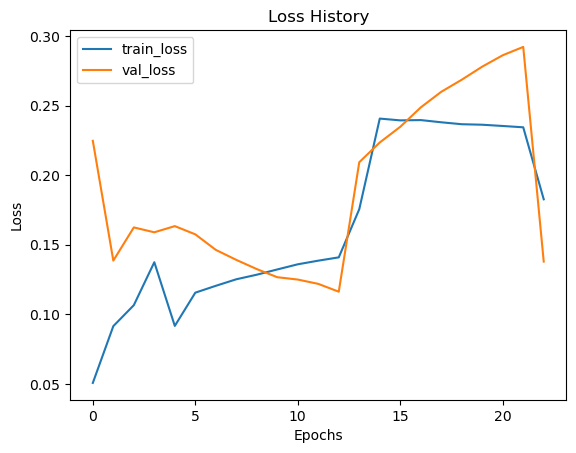

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

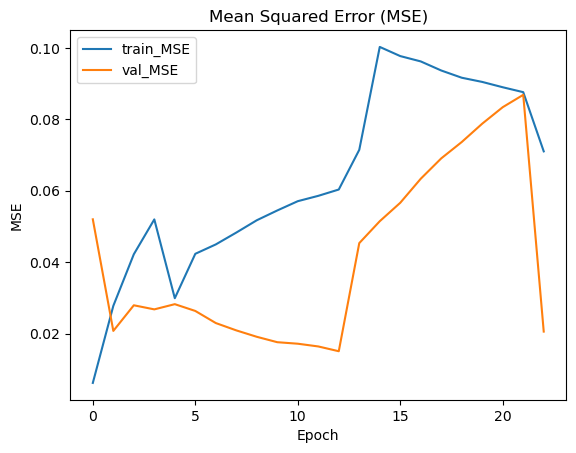

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

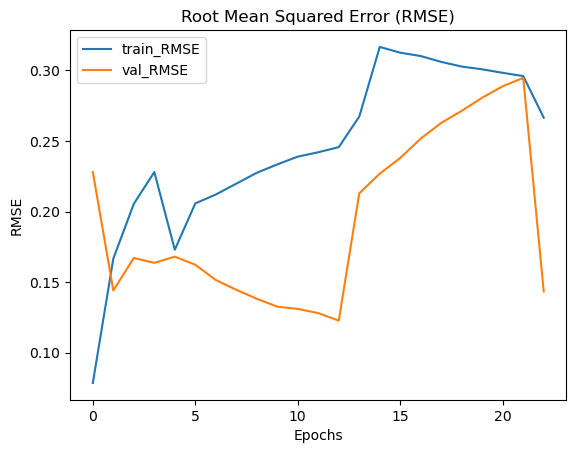

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

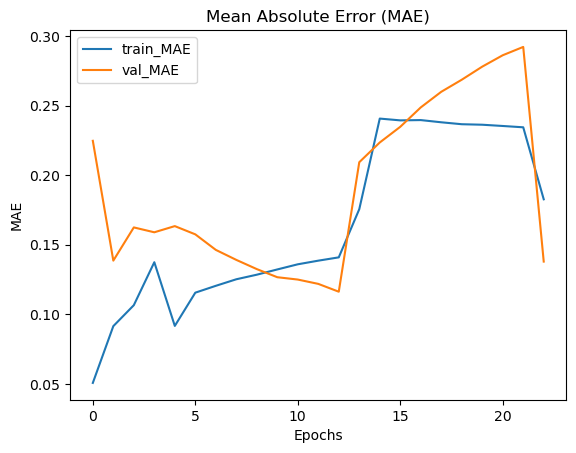

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

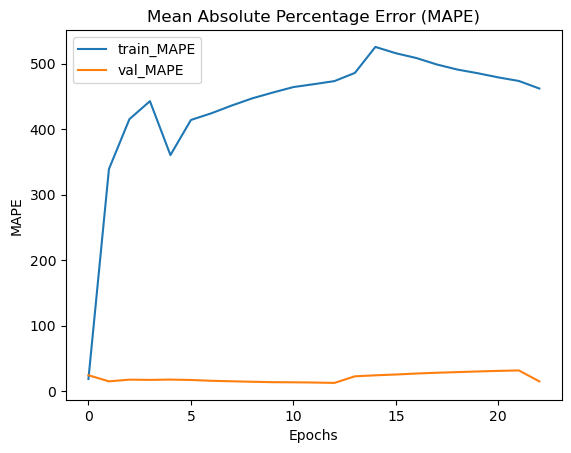

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 20:14:50.627491: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7598, 4, 5)
Labels Shape: (7598, 1, 1)
Prediction Shape: (7598, 1, 10)


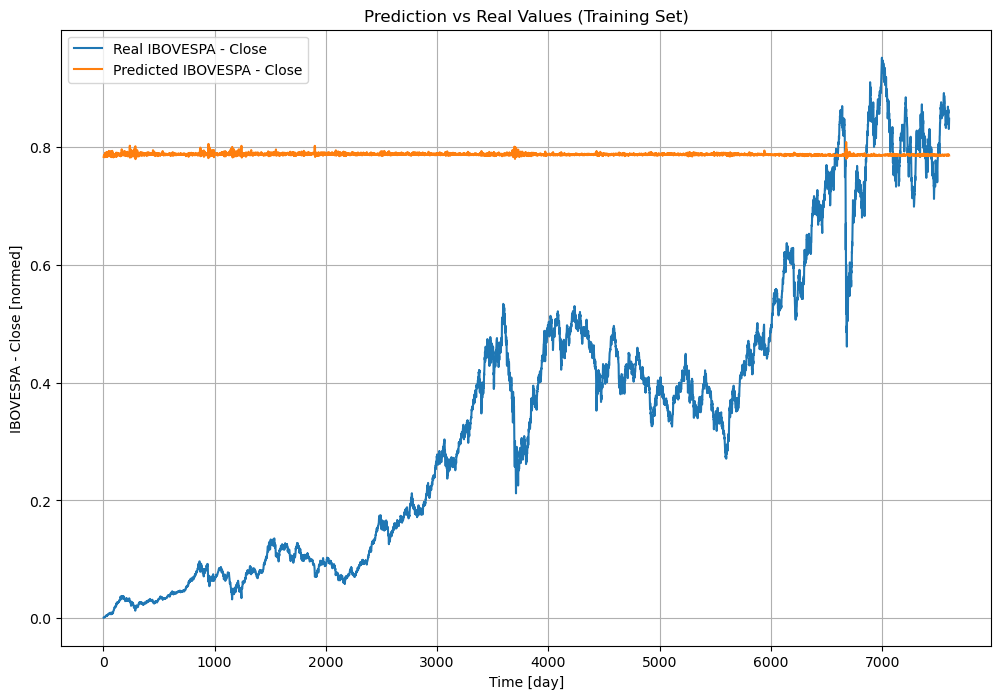

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 5)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


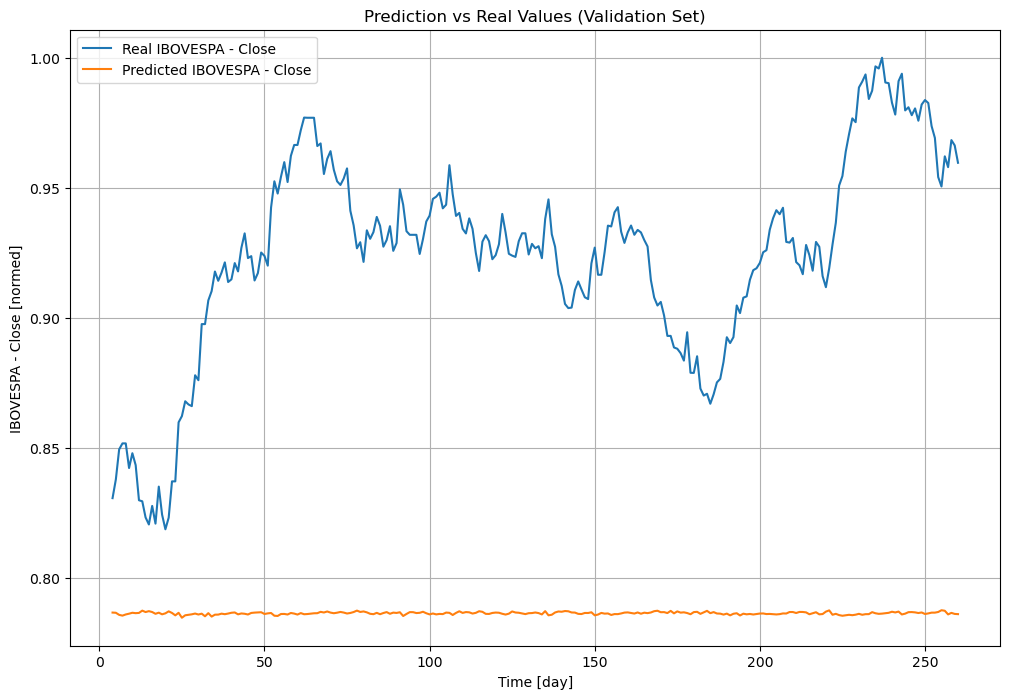

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 5)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


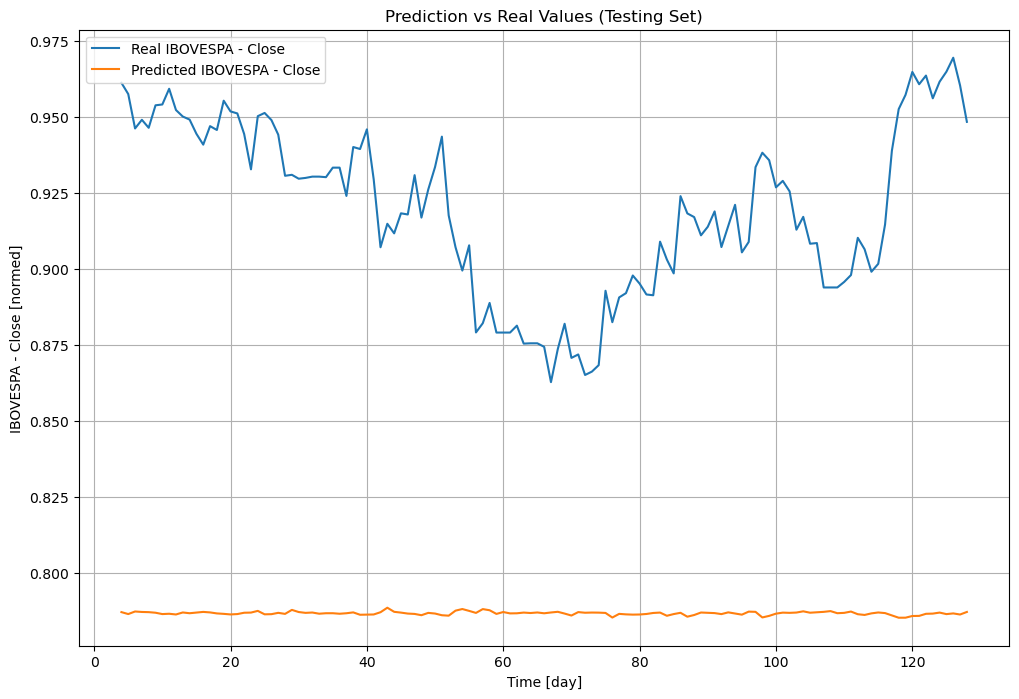

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

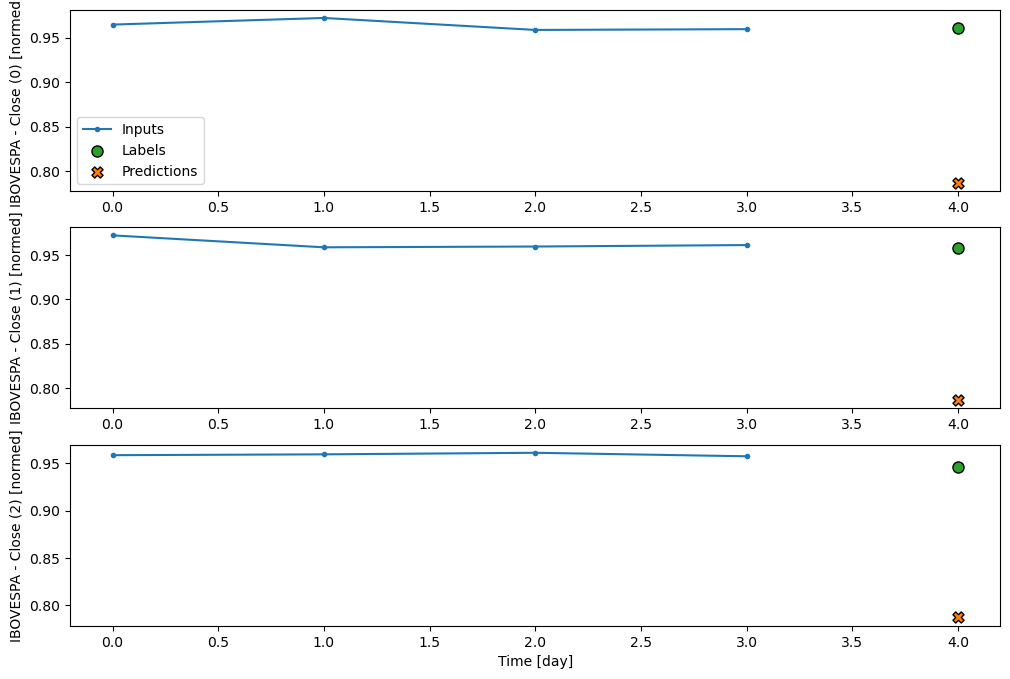

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:52s:320ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step


array([[[0.787013  , 0.787013  , 0.787013  , ..., 0.787013  ,
         0.787013  , 0.787013  ]],

       [[0.78637296, 0.78637296, 0.78637296, ..., 0.78637296,
         0.78637296, 0.78637296]],

       [[0.7872204 , 0.7872204 , 0.7872204 , ..., 0.7872204 ,
         0.7872204 , 0.7872204 ]],

       ...,

       [[0.7865882 , 0.7865882 , 0.7865882 , ..., 0.7865882 ,
         0.7865882 , 0.7865882 ]],

       [[0.7862251 , 0.7862251 , 0.7862251 , ..., 0.7862251 ,
         0.7862251 , 0.7862251 ]],

       [[0.78706723, 0.78706723, 0.78706723, ..., 0.78706723,
         0.78706723, 0.78706723]]], shape=(125, 1, 10), dtype=float32)

In [53]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')